In [1]:
from astrodendro import Dendrogram
import astropy
import matplotlib
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from matplotlib.colors import LogNorm
from astropy.wcs import WCS
from astropy import wcs
import astropy.wcs
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
import numpy as np
from astropy.coordinates import match_coordinates_sky
from astropy.convolution import Gaussian2DKernel
from scipy.signal import convolve as scipy_convolve
from astropy.convolution import convolve, convolve_fft
from astropy.convolution import interpolate_replace_nans
from astropy.nddata.utils import Cutout2D
import matplotlib.pyplot as mpl
from matplotlib import cm
import matplotlib as mp
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors
import astropy.units as u
from spectral_cube import SpectralCube
from matplotlib.colors import LogNorm
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
import plotly.graph_objects as go
import skimage.measure as measure
%matplotlib inline
import astropy.io.fits as pyfits
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
def open_files(file):
    filename = file
    hdu  = fits.open(filename)[0]
    wcs=WCS(hdu.header)
    if hdu.header['NAXIS']==3:
        wcs=wcs.dropaxis(2)
    return hdu, wcs

In [3]:
h2co = 'non_pb_corrected_from_dan_G0.068-0.075.H2CO.218.2GHz_30_74.fits'
hdu_h2co=fits.open(h2co)[0]
wcs_h2co = wcs.WCS(hdu_h2co)
data,header = fits.getdata(h2co,header=True)
wcs_h2co = wcs.WCS(header)

h2co_cube = fits.open('non_pb_corrected_from_dan_G0.068-0.075.H2CO.218.2GHz_30_74.fits')
cube = SpectralCube.read(h2co_cube) 
h2co_cube.close()

xray_3= 'Xray_Clavel_chandra_pigs_cube_smoothed_3k_updated.fits'
hdu_xray_3=fits.open(xray_3)[0]
wcs_xray_3 = wcs.WCS(hdu_xray_3)

xray_4= 'Xray_Clavel_chandra_pigs_cube_smoothed_4k_updated_stone_only.fits'
hdu_xray_4=fits.open(xray_4)[0]
wcs_xray_4 = wcs.WCS(hdu_xray_4)

h2co_int = 'non_pb_corrected_from_dan_G0.068-0.075.H2CO.218.2GHz_integrated.fits'
hdu_h2co_int=fits.open(h2co_int)[0]
wcs_h2c_int = wcs.WCS(hdu_h2co_int)

In [5]:
import numpy as np

# Sample data
stdvs = np.array([.01,.017,.009,.01,.015,.013,.022,.011,.01,.011,.011,.01,.01,.008,.009])  # Replace with your data array
med_sigma=np.nanmedian(stdvs)

#medians = np.array([.01,.017,.009,.01,.015,.013,.022,.011,.01,.011,.011,.01,.01,.008,.009])  # Replace with your data array
#med_medians=np.median(medians)
# Calculate mean and standard deviation
#std_dev = np.nanstd(data)
mean_sigma=0.0117333
print('Mean Sigma Value=',mean_sigma)
print('Median Sigma Value=',med_sigma)

values=np.array([.06,-.01,0.00,0.00,.04,.1,-.01,-.01,-.03,.03,.03,.02,-.02,-.03,.06])
med_value=np.nanmean(values)
print('Mean Values on outer image=',med_value)
beam_size_arc=3
pixel_scale=.0001388888888889

beam_size_pix=beam_size_arc/(pixel_scale*3600)
print('Beam size in pixels:',beam_size_pix)

med_sigma_pix=med_value+(0.01/(pixel_scale*3600))

print('Median Sigma in pixels (mean value+beam size in pizels):',med_sigma_pix)

Mean Sigma Value= 0.0117333
Median Sigma Value= 0.01
Mean Values on outer image= 0.015333333333333334
Beam size in pixels: 5.99999999999952
Median Sigma in pixels (mean value+beam size in pizels): 0.03533333333333173


In [6]:
d = Dendrogram.compute(hdu_h2co.data,wcs=wcs_h2co,min_value=3*med_sigma_pix,min_delta=med_sigma_pix*8,min_npix=beam_size_pix)

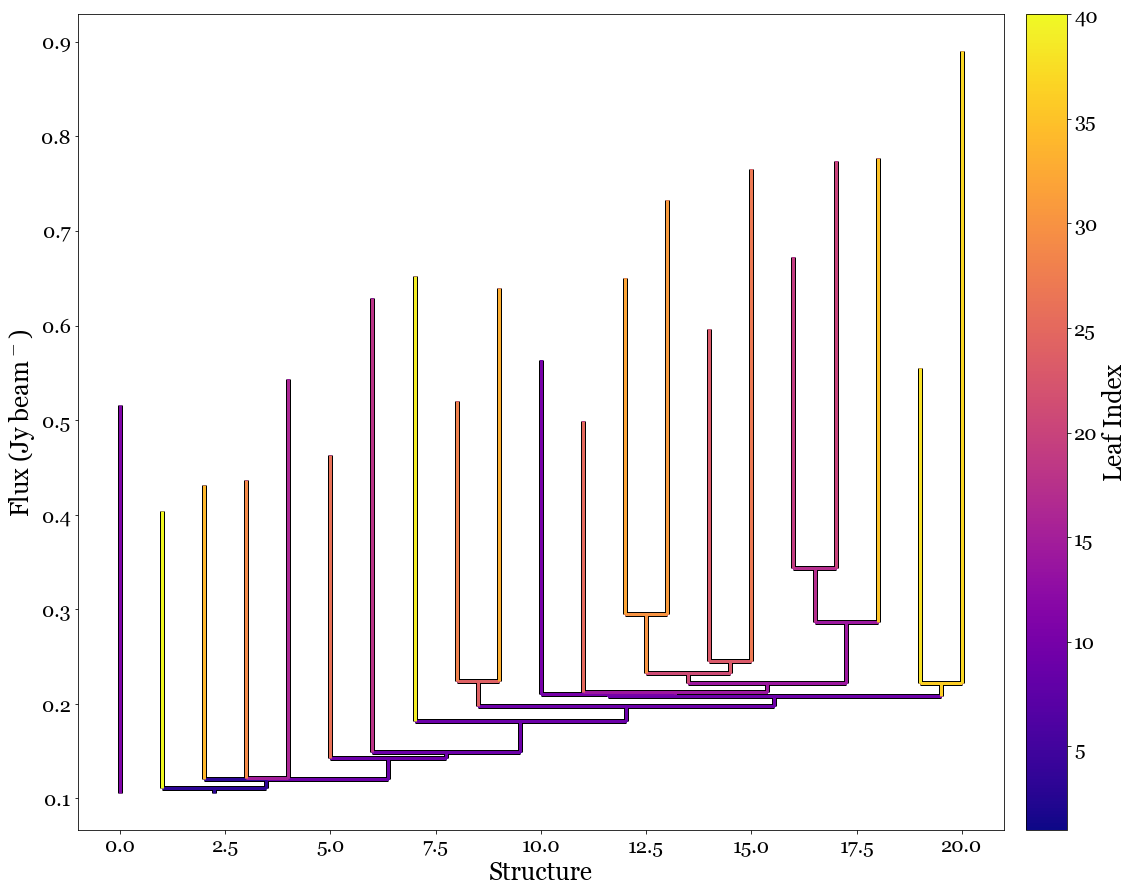

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Sample data and setup
p = d.plotter()  # Assuming `d.plotter()` is predefined
mpl.rcParams['mathtext.fontset'] = "cm"
mpl.rcParams['font.family'] = "georgia"
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(1, 1, 1)

leaves = np.arange(40) + 1
cmap = cm.get_cmap('plasma')
array = np.linspace(0, 1, 40)
rgb_leaves = cmap(array)

# Plot the whole tree
p.plot_tree(ax, color='black', lw=5)

# Plot each leaf with its corresponding color
for i in range(40):
    p.plot_tree(ax, [i], color=[rgb_leaves[i]], lw=3)

# Add axis labels
ax.set_xlabel("Structure", fontsize=25)
ax.set_ylabel(r"Flux (Jy beam$^-$)", fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=20)

# Create a colorbar
norm = mpl.colors.Normalize(vmin=leaves.min(), vmax=leaves.max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Only needed for colorbar

# Add colorbar to the figure
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('Leaf Index', fontsize=25)
cbar.ax.tick_params(labelsize=20)

plt.show()


In [133]:
fig.savefig('dendrogram_tree_stone.png',bbox_inches='tight',dpi=500)

In [4]:
h2co_int = 'non_pb_corrected_from_dan_G0.068-0.075.H2CO.218.2GHz_integrated.fits'
hdu_h2co_int=fits.open(h2co_int)
wcs_h2co_int = wcs.WCS(hdu_h2co_int[0])

In [5]:
h2co = 'non_pb_corrected_from_dan_G0.068-0.075.H2CO.218.2GHz.fits'
hdu_h2co=fits.open(h2co)[0]
wcs_h2co = WCS(hdu_h2co)

In [9]:
print('Number of Trunks: ',len(d.trunk))
print('Number of Trunks + Leaves: ',len(d.leaves))
num_leaves=len(d.leaves)
num_trunk=len(d.trunk)
num_vel=40

Number of Trunks:  2
Number of Trunks + Leaves:  21


In [436]:
#d = Dendrogram.compute(hdu_h2co.data,wcs=wcs_h2co.dropaxis(2),min_value=3*one_sigma,min_delta=4*one_sigma,min_npix=beam_size_pix)

for i in range(len(d.leaves)):
    structure = d[leaves_idx[i]]

    mask = structure.get_mask()
    mask_hdu = fits.PrimaryHDU(mask.astype('short'), hdu_h2co_int[0].header)
    hdu_masked = fits.HDUList([mask_hdu])
    hdu_masked.writeto('dendrograms/leaf_idx_{}_mask.fits'.format(leaves_idx[i]), overwrite=True)

<Figure size 1440x2160 with 0 Axes>

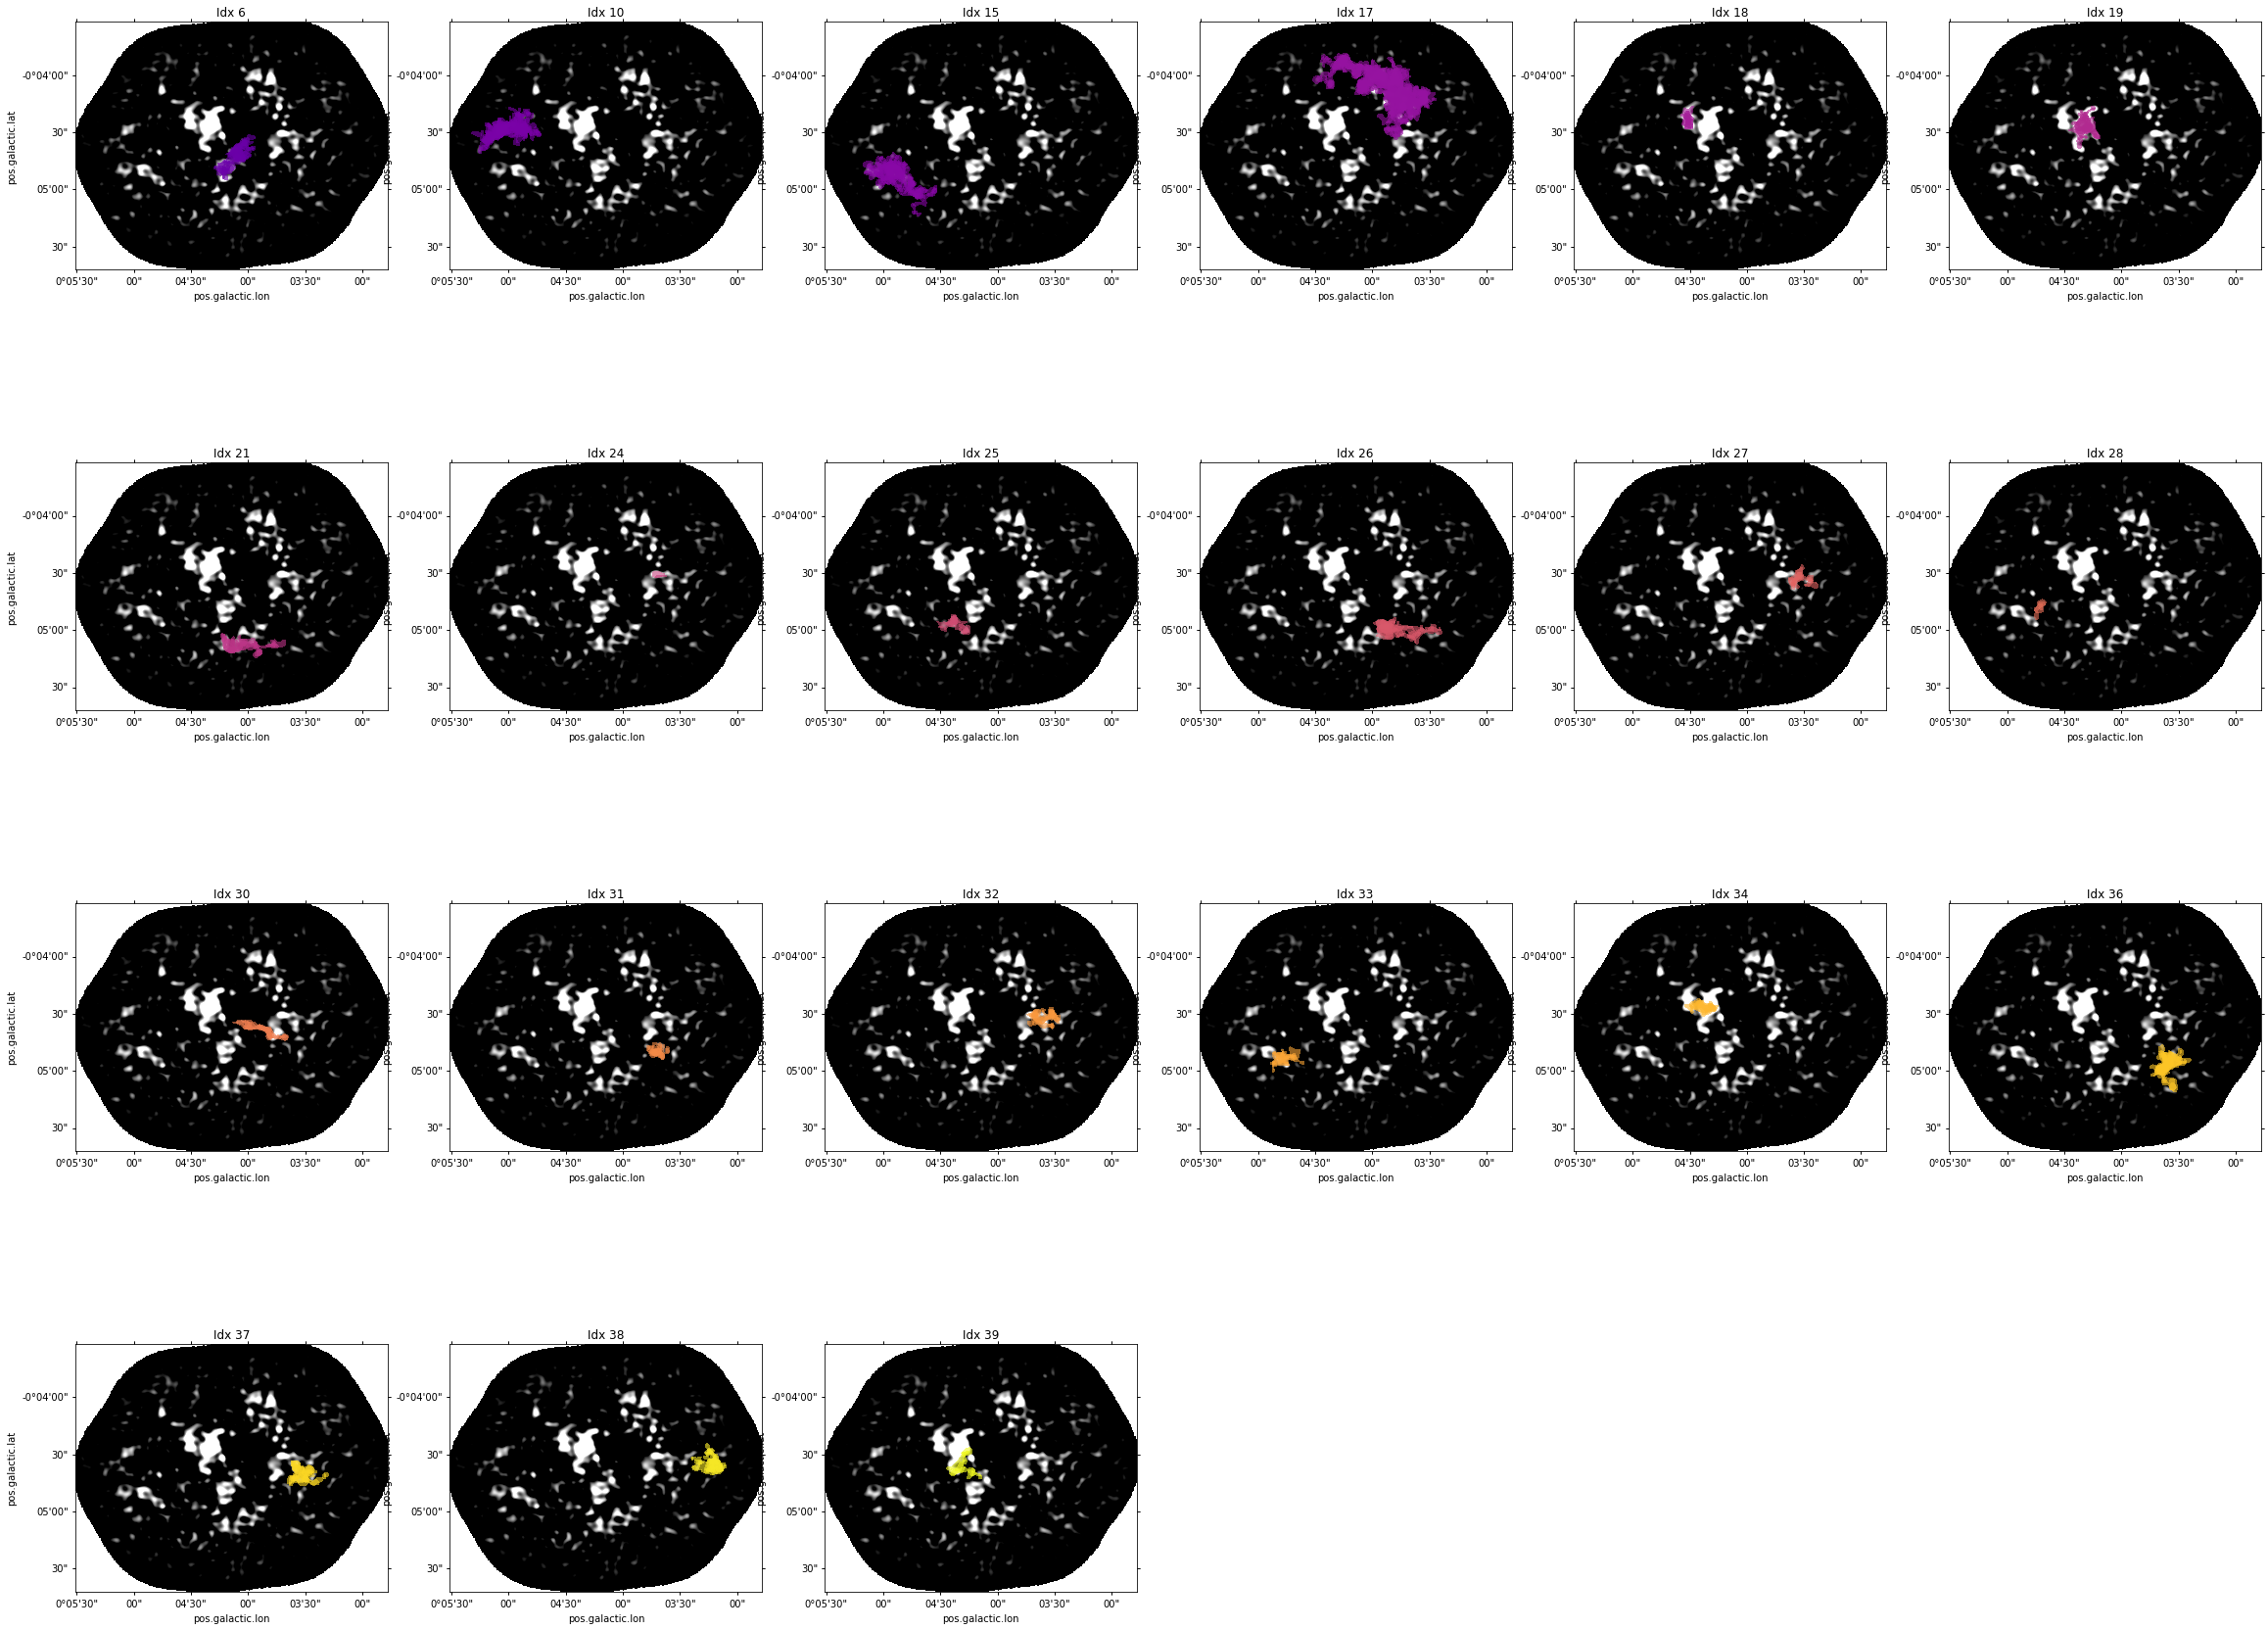

In [351]:
fig=plt.figure(figsize=(20,30))


leaves = np.arange(len(leaves_idx))+1
cmap = cm.get_cmap('plasma')
array = np.linspace(.2,1,len(leaves_idx))
color_leaves = cmap(array)


fig = plt.figure(figsize=(40,40))
row = 5
col = 6
for j in range(len(leaves_idx)):
    trunk = 'dendrograms/leaf_idx_{}_mask.fits'.format(leaves_idx[j])
    hdu_trunk = fits.open(trunk)[0]
    wcs_trunk = WCS(hdu_trunk)
    ax = fig.add_subplot(row, col, j + 1, projection=wcs_trunk.dropaxis(2))
    ax.imshow(cube.unmasked_data[10], vmin=0.07, vmax=0.25, cmap='gray', origin='lower')
    for i in range(num_vel):  # 247 is number of velocities for full H2CO, 40 for 34_70 KM/S
        masked = np.where(hdu_trunk.data[i] != 1, hdu_trunk.data[i], np.nan)
        ax.contourf(hdu_trunk.data[i], masked, levels=[.99, 1.01], alpha=0.6,colors=[color_leaves[j]])
        # ax.contour(hdu_trunk.data[i], masked, levels=[1], alpha=0.3)
        #ax.contour(hdu_xray_cropped_s.data[8], levels=[3e-9], colors='red', transform=ax.get_transform(wcs_xray_cropped_s))
        #ax.contour(hdu_xray_3.data[8], levels=[7e-9], colors='pink', transform=ax.get_transform(wcs_xray_3))

    ax.set_title('Idx {}'.format(str(leaves_idx[j])))
plt.show()

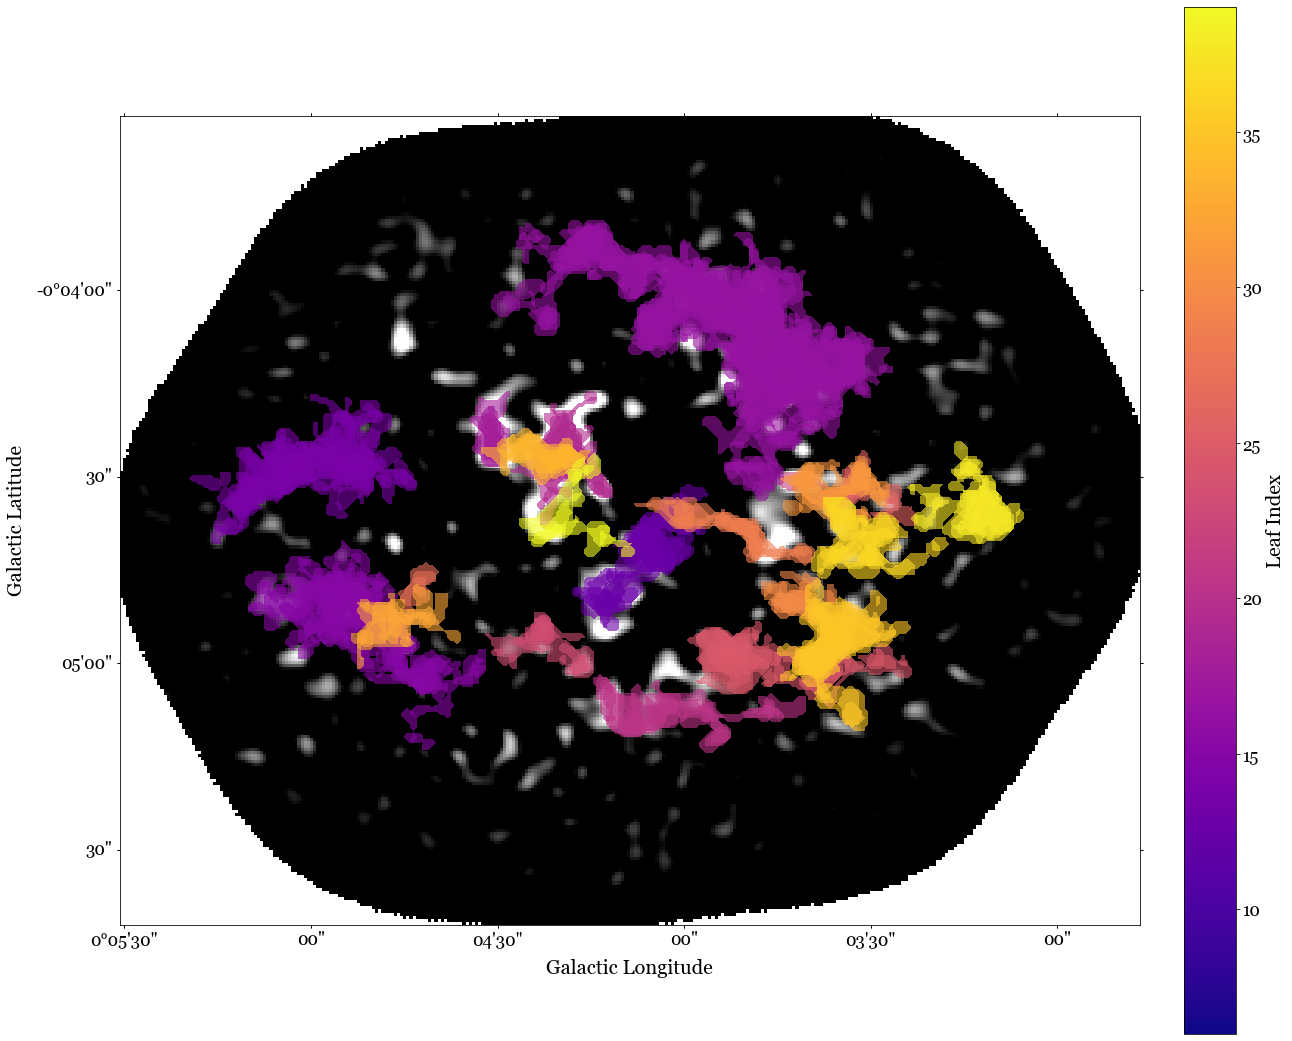

In [382]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Set plot style
mpl.rcParams['mathtext.fontset'] = "cm"
mpl.rcParams['font.family'] = "georgia"

# Define colormap for leaves
leaves = np.arange(len(leaves_idx)) + 1
cmap = cm.get_cmap('plasma')
array = np.linspace(0.2, 1, len(leaves_idx))
color_leaves = cmap(array)

fig = plt.figure(figsize=(20, 35))
ax = fig.add_subplot(1, 1, 1, projection=wcs_trunk.dropaxis(2))
lon = ax.coords[0]
lat = ax.coords[1]

# Set axis labels
ax.set_xlabel("Galactic Longitude", fontsize=20)
lon.set_ticklabel(size=17)
ax.set_ylabel("Galactic Latitude", fontsize=20)
lat.set_ticklabel(size=17)

# Display base grayscale image
ax.imshow(cube.unmasked_data[10], vmin=0.07, vmax=0.25, cmap='gray', origin='lower')

# Loop through leaves and contour each masked data layer
for j in range(len(leaves_idx)):
    trunk = 'dendrograms/leaf_idx_{}_mask.fits'.format(leaves_idx[j])
    hdu_trunk = fits.open(trunk)[0]
    wcs_trunk = WCS(hdu_trunk)
    
    for i in range(num_vel):  # Adjust for the specific number of velocities
        masked = np.where(hdu_trunk.data[i] != 1, hdu_trunk.data[i], np.nan)
        ax.contourf(hdu_trunk.data[i], masked, levels=[0.99, 1.01], alpha=0.6, colors=[color_leaves[j]])

# Create a colorbar for the contour colors
# Set up the ScalarMappable to map colors from the colormap to the leaf indices
norm = mcolors.Normalize(vmin=min(leaves_idx), vmax=max(leaves_idx))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # This is required for ScalarMappable to work with colorbar

# Add colorbar for the contours
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
cbar.set_label('Leaf Index', fontsize=20)
cbar.ax.tick_params(labelsize=17)

plt.show()


/var/folders/8n/_rhj_p6j11j3hj9wn3tzy0280000gn/T/ipykernel_44648/3242556166.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.05, w_pad=0.05, h_pad=0.0)


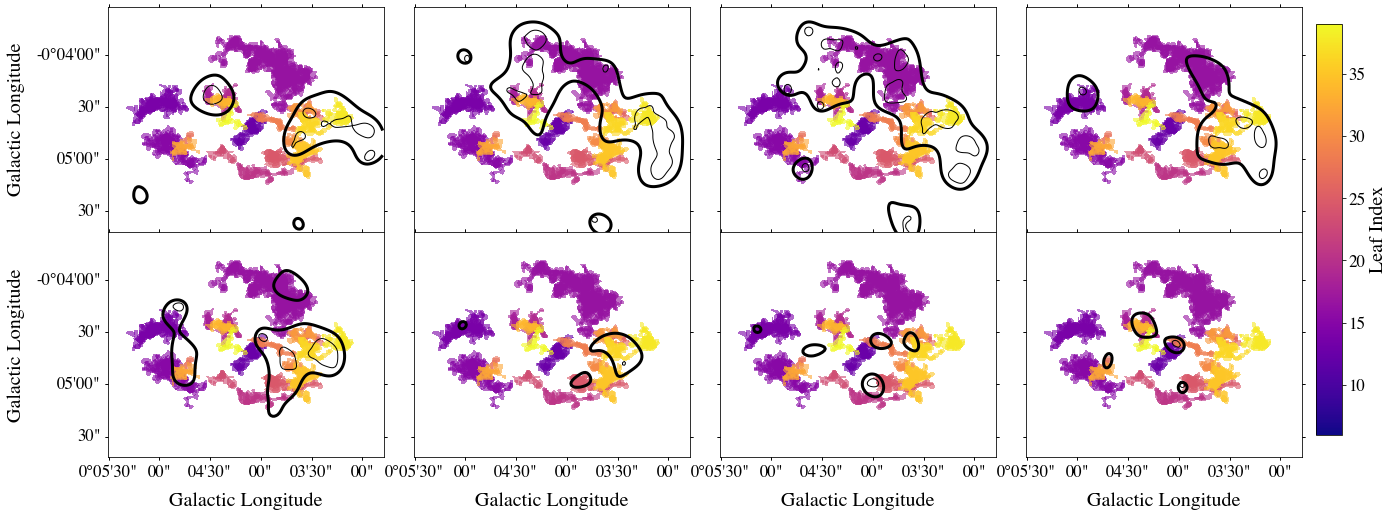

In [476]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Set plot style
mpl.rcParams['mathtext.fontset'] = "cm"
mpl.rcParams['font.family'] = "Times"

# Define leaves and colormap
leaves = np.arange(len(leaves_idx)) + 1
cmap = cm.get_cmap('plasma')
array = np.linspace(0.2, 1, len(leaves_idx))
color_leaves = cmap(array)

fig = plt.figure(figsize=(18, 7))
row = 2
col = 4

for j in range(row * col):
    ax = fig.add_subplot(row, col, j + 1, projection=wcs_trunk.dropaxis(2))
    lon = ax.coords[0]
    lat = ax.coords[1]

    # Plot contours for each leaf
    for k in range(len(leaves_idx)):
        trunk = 'dendrograms/leaf_idx_{}_mask.fits'.format(leaves_idx[k])
        hdu_trunk = fits.open(trunk)[0]
        
        for i in range(num_vel):  # Adjust for your specific number of velocities
            masked = np.where(hdu_trunk.data[i] != 1, hdu_trunk.data[i], np.nan)
            ax.contourf(hdu_trunk.data[i], masked, levels=[0.99, 1.01], alpha=0.6, colors=[color_leaves[k]])

    # Plot additional contours
    ax.contour(hdu_xray_cropped_s.data[9 + j], levels=[3e-9], colors='k', transform=ax.get_transform(wcs_xray_cropped_s), linewidths=3)
    ax.contour(hdu_xray_3.data[9 + j], levels=[7e-9], colors='k', transform=ax.get_transform(wcs_xray_3), linewidths=1)
    
    # Set axis labels only for edge subplots
    if j % col == 0:  # Leftmost column, show y-axis
        ax.set_ylabel("Galactic Longitude", fontsize=20)
        lon.set_ticklabel(size=17)
        lat.set_ticklabel(size=17)
    else:  # Hide y-axis on other columns
        lat.set_ticklabel_visible(False)
        lat.set_axislabel('')

    if j >= col * (row - 1):  # Bottom row, show x-axis
        ax.set_xlabel("Galactic Longitude", fontsize=20)
        lon.set_ticklabel(size=17)
        lat.set_ticklabel(size=17)
    else:  # Hide x-axis on other rows
        lon.set_ticklabel_visible(False)
        lon.set_axislabel('')

# Set up the colorbar for the leaves using ScalarMappable
norm = mcolors.Normalize(vmin=min(leaves_idx), vmax=max(leaves_idx))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # This is required for ScalarMappable to work with colorbar

# Add a colorbar for the contour colors
cbar_ax = fig.add_axes([1.01, 0.15, 0.02, 0.815])
cbar = fig.colorbar(sm, ax=fig.axes, orientation='vertical', cax=cbar_ax)
cbar.set_label('Leaf Index', fontsize=20)
cbar.ax.tick_params(labelsize=17)

plt.tight_layout(pad=0.05, w_pad=0.05, h_pad=0.0)
plt.show()


/var/folders/8n/_rhj_p6j11j3hj9wn3tzy0280000gn/T/ipykernel_47074/3013484651.py:108: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.05, w_pad=0.05, h_pad=0.0)


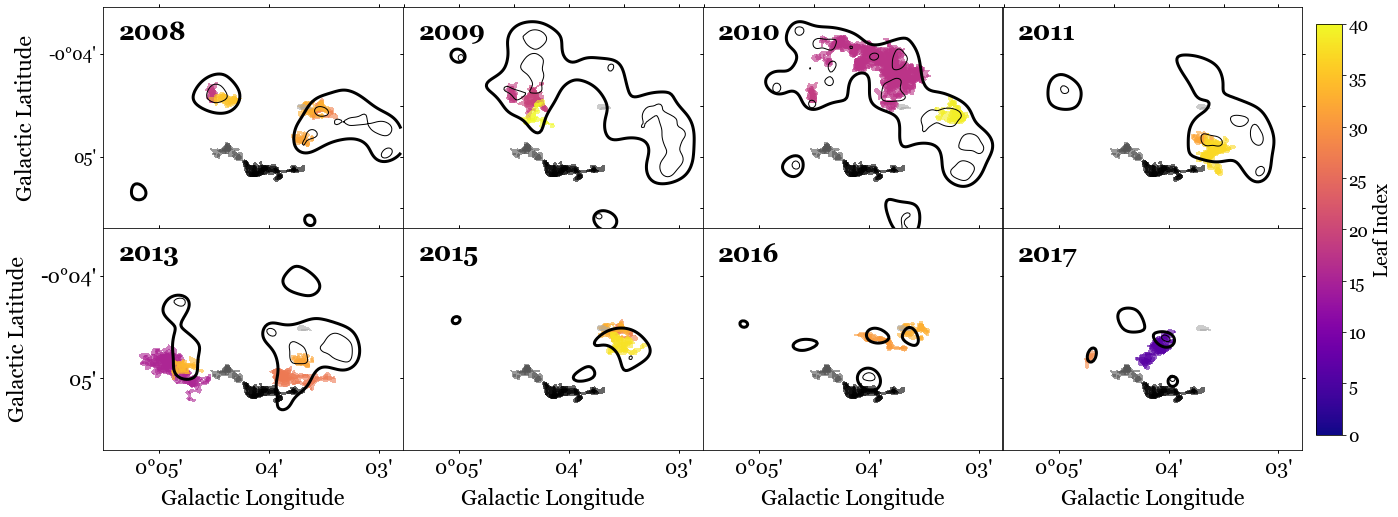

In [13]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Set plot style
mpl.rcParams['mathtext.fontset'] = "cm"
mpl.rcParams['font.family'] = "georgia"

selected_leaves_idx = [[27,18,31,32,34],
                        [19,18,39],
                        [17,18,38],
                        [31,36],
                        [15,31,33,26],
                        [27,32,37],
                        [30,32],
                        [28,6]


]
num_vel=40
nm_leaves=[21,25,24]
# Define leaves and colormap
gray_cmap = cm.get_cmap('gray')
nm_array = np.linspace(0, 1, len(nm_leaves)+1)
nm_color_leaves = gray_cmap(nm_array)

# Define leaves and colormap
cmap = cm.get_cmap('plasma')
array = np.linspace(0, 1, len(leaves_idx))
color_leaves = cmap(array)

# Define leaves and colormap
cmap_full = cm.get_cmap('plasma')
array_full = np.linspace(0, 1, 40)
color_leaves_full = cmap(array_full)

fig = plt.figure(figsize=(18, 7))
row = 2
col = 4
xray_year=[2008,2009,2010,2011,2013,2015,2016,2017]

for j in range(row * col):
    ax = fig.add_subplot(row, col, j + 1, projection=wcs_h2co.dropaxis(2))
    lon = ax.coords[0]
    lat = ax.coords[1]

    # Plot contours for each leaf
    for k in range(len(selected_leaves_idx[j])):
        trunk = 'dendrograms/leaf_idx_{}_mask.fits'.format(selected_leaves_idx[j][k])
        hdu_trunk = fits.open(trunk)[0]
        
        for i in range(num_vel):  # Adjust for your specific number of velocities
            masked = np.where(hdu_trunk.data[i] != 1, hdu_trunk.data[i], np.nan)
            index=str([])
            ax.contourf(hdu_trunk.data[i], masked, levels=[0.99, 1.01], alpha=0.6, colors=[color_leaves_full[selected_leaves_idx[j][k]]])

    for m in range(len(nm_leaves)):
        trunk = 'dendrograms/leaf_idx_{}_mask.fits'.format(nm_leaves[m])
        hdu_trunk = fits.open(trunk)[0]
        
        for n in range(num_vel):  # Adjust for your specific number of velocities
            masked = np.where(hdu_trunk.data[n] != 1, hdu_trunk.data[n], np.nan)
            ax.contourf(hdu_trunk.data[n], masked, levels=[0.99, 1.01], alpha=0.6, colors=[nm_color_leaves[m]])
        

    # Plot additional contours
    ax.contour(hdu_xray_4.data[9+j], levels=[3e-9], colors='k', transform=ax.get_transform(wcs_xray_4.dropaxis(2)), linewidths=3)
    ax.contour(hdu_xray_3.data[9+j], levels=[7e-9], colors='k', transform=ax.get_transform(wcs_xray_3.dropaxis(2)), linewidths=1)
    ax.text(0.05, 0.85, str(round(xray_year[j])), fontsize=25, transform=ax.transAxes,color="k",weight='bold')# bbox=dict(facecolor='white', alpha=0.9)
    
    # Set axis labels only for edge subplots
    if j % col == 0:  # Leftmost column, show y-axis
        ax.set_ylabel("Galactic Latitude", fontsize=22)
        lon.set_ticklabel(size=17)
        lat.set_ticklabel(size=17)
        lat.set_major_formatter('dd:mm')
        lon.set_major_formatter('dd:mm')
    else:  # Hide y-axis on other columns
        lat.set_ticklabel_visible(False)
        lat.set_axislabel('')


    if j >= col * (row - 1):  # Bottom row, show x-axis
        ax.set_xlabel("Galactic Longitude", fontsize=22)
        lon.set_ticklabel(size=20)
        lat.set_ticklabel(size=20)
        lat.set_major_formatter('dd:mm')
        lon.set_major_formatter('dd:mm')
    else:  # Hide x-axis on other rows
        lon.set_ticklabel_visible(False)
        lon.set_axislabel('')

# Set up the colorbar for the leaves using ScalarMappable
norm = mcolors.Normalize(vmin=0, vmax=40)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # This is required for ScalarMappable to work with colorbar

# Add a colorbar for the contour colors
cbar_ax = fig.add_axes([1.01, 0.15, 0.02, 0.815])
cbar = fig.colorbar(sm, ax=fig.axes, orientation='vertical', cax=cbar_ax)
cbar.set_label('Leaf Index', fontsize=20)
cbar.ax.tick_params(labelsize=17)

plt.tight_layout(pad=0.05, w_pad=0.05, h_pad=0.0)
plt.show()


In [86]:
fig.savefig('dendrogram_leaves_stone_new.pdf',bbox_inches='tight',dpi=500)

In [17]:
fig.savefig('dendrogram_leaves_stone.png',bbox_inches='tight',dpi=500)

/var/folders/8n/_rhj_p6j11j3hj9wn3tzy0280000gn/T/ipykernel_8924/1130778124.py:99: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.05, w_pad=0.05, h_pad=0.0)


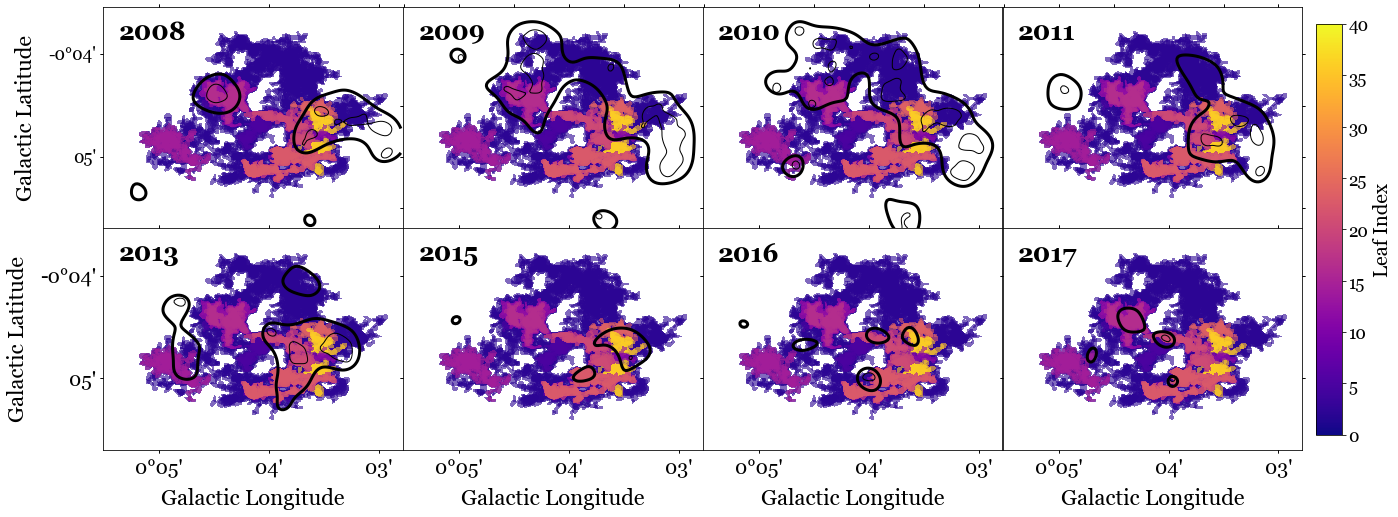

In [35]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Set plot style
mpl.rcParams['mathtext.fontset'] = "cm"
mpl.rcParams['font.family'] = "georgia"

selected_leaves_idx = [[2,],
                        [5],
                        [23],
                        [2,5,23,35,11,14,20,22,12,16],
                        [2,5,23,35,11,14,20,22,12,16],
                        [2,5,23,35,11,14,20,22,12,16],
                        [2,5,23,35,11,14,20,22,12,16],
                        [2,5,23,35,11,14,20,22,12,16]


]
num_vel=40
nm_leaves=[21,25]
# Define leaves and colormap
gray_cmap = cm.get_cmap('gray')
nm_array = np.linspace(0, 1, len(nm_leaves)+1)
nm_color_leaves = gray_cmap(nm_array)

# Define leaves and colormap
cmap = cm.get_cmap('plasma')
array = np.linspace(0, 1, len(leaves_idx))
color_leaves = cmap(array)

# Define leaves and colormap
cmap_full = cm.get_cmap('plasma')
array_full = np.linspace(0, 1, 40)
color_leaves_full = cmap(array_full)

fig = plt.figure(figsize=(18, 7))
row = 2
col = 4
xray_year=[2008,2009,2010,2011,2013,2015,2016,2017]

for j in range(row * col):
    ax = fig.add_subplot(row, col, j + 1, projection=wcs_h2co.dropaxis(2))
    lon = ax.coords[0]
    lat = ax.coords[1]

    # Plot contours for each leaf
    for k in range(len(selected_leaves_idx[j])):
        trunk = 'dendrograms/branches_idx_{}_mask.fits'.format(selected_leaves_idx[j][k])
        hdu_trunk = fits.open(trunk)[0]
        
        for i in range(num_vel):  # Adjust for your specific number of velocities
            masked = np.where(hdu_trunk.data[i] != 1, hdu_trunk.data[i], np.nan)
            index=str([])
            ax.contourf(hdu_trunk.data[i], masked, levels=[0.99, 1.01], alpha=0.6, colors=[color_leaves_full[selected_leaves_idx[j][k]]])
        
    # Plot additional contours
    ax.contour(hdu_xray_4.data[9+j], levels=[3e-9], colors='k', transform=ax.get_transform(wcs_xray_4.dropaxis(2)), linewidths=3)
    ax.contour(hdu_xray_3.data[9+j], levels=[7e-9], colors='k', transform=ax.get_transform(wcs_xray_3.dropaxis(2)), linewidths=1)
    ax.text(0.05, 0.85, str(round(xray_year[j])), fontsize=25, transform=ax.transAxes,color="k",weight='bold')# bbox=dict(facecolor='white', alpha=0.9)
    
    # Set axis labels only for edge subplots
    if j % col == 0:  # Leftmost column, show y-axis
        ax.set_ylabel("Galactic Latitude", fontsize=22)
        lon.set_ticklabel(size=17)
        lat.set_ticklabel(size=17)
        lat.set_major_formatter('dd:mm')
        lon.set_major_formatter('dd:mm')
    else:  # Hide y-axis on other columns
        lat.set_ticklabel_visible(False)
        lat.set_axislabel('')


    if j >= col * (row - 1):  # Bottom row, show x-axis
        ax.set_xlabel("Galactic Longitude", fontsize=22)
        lon.set_ticklabel(size=20)
        lat.set_ticklabel(size=20)
        lat.set_major_formatter('dd:mm')
        lon.set_major_formatter('dd:mm')
    else:  # Hide x-axis on other rows
        lon.set_ticklabel_visible(False)
        lon.set_axislabel('')

# Set up the colorbar for the leaves using ScalarMappable
norm = mcolors.Normalize(vmin=0, vmax=40)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # This is required for ScalarMappable to work with colorbar

# Add a colorbar for the contour colors
cbar_ax = fig.add_axes([1.01, 0.15, 0.02, 0.815])
cbar = fig.colorbar(sm, ax=fig.axes, orientation='vertical', cax=cbar_ax)
cbar.set_label('Leaf Index', fontsize=20)
cbar.ax.tick_params(labelsize=17)

plt.tight_layout(pad=0.05, w_pad=0.05, h_pad=0.0)
plt.show()


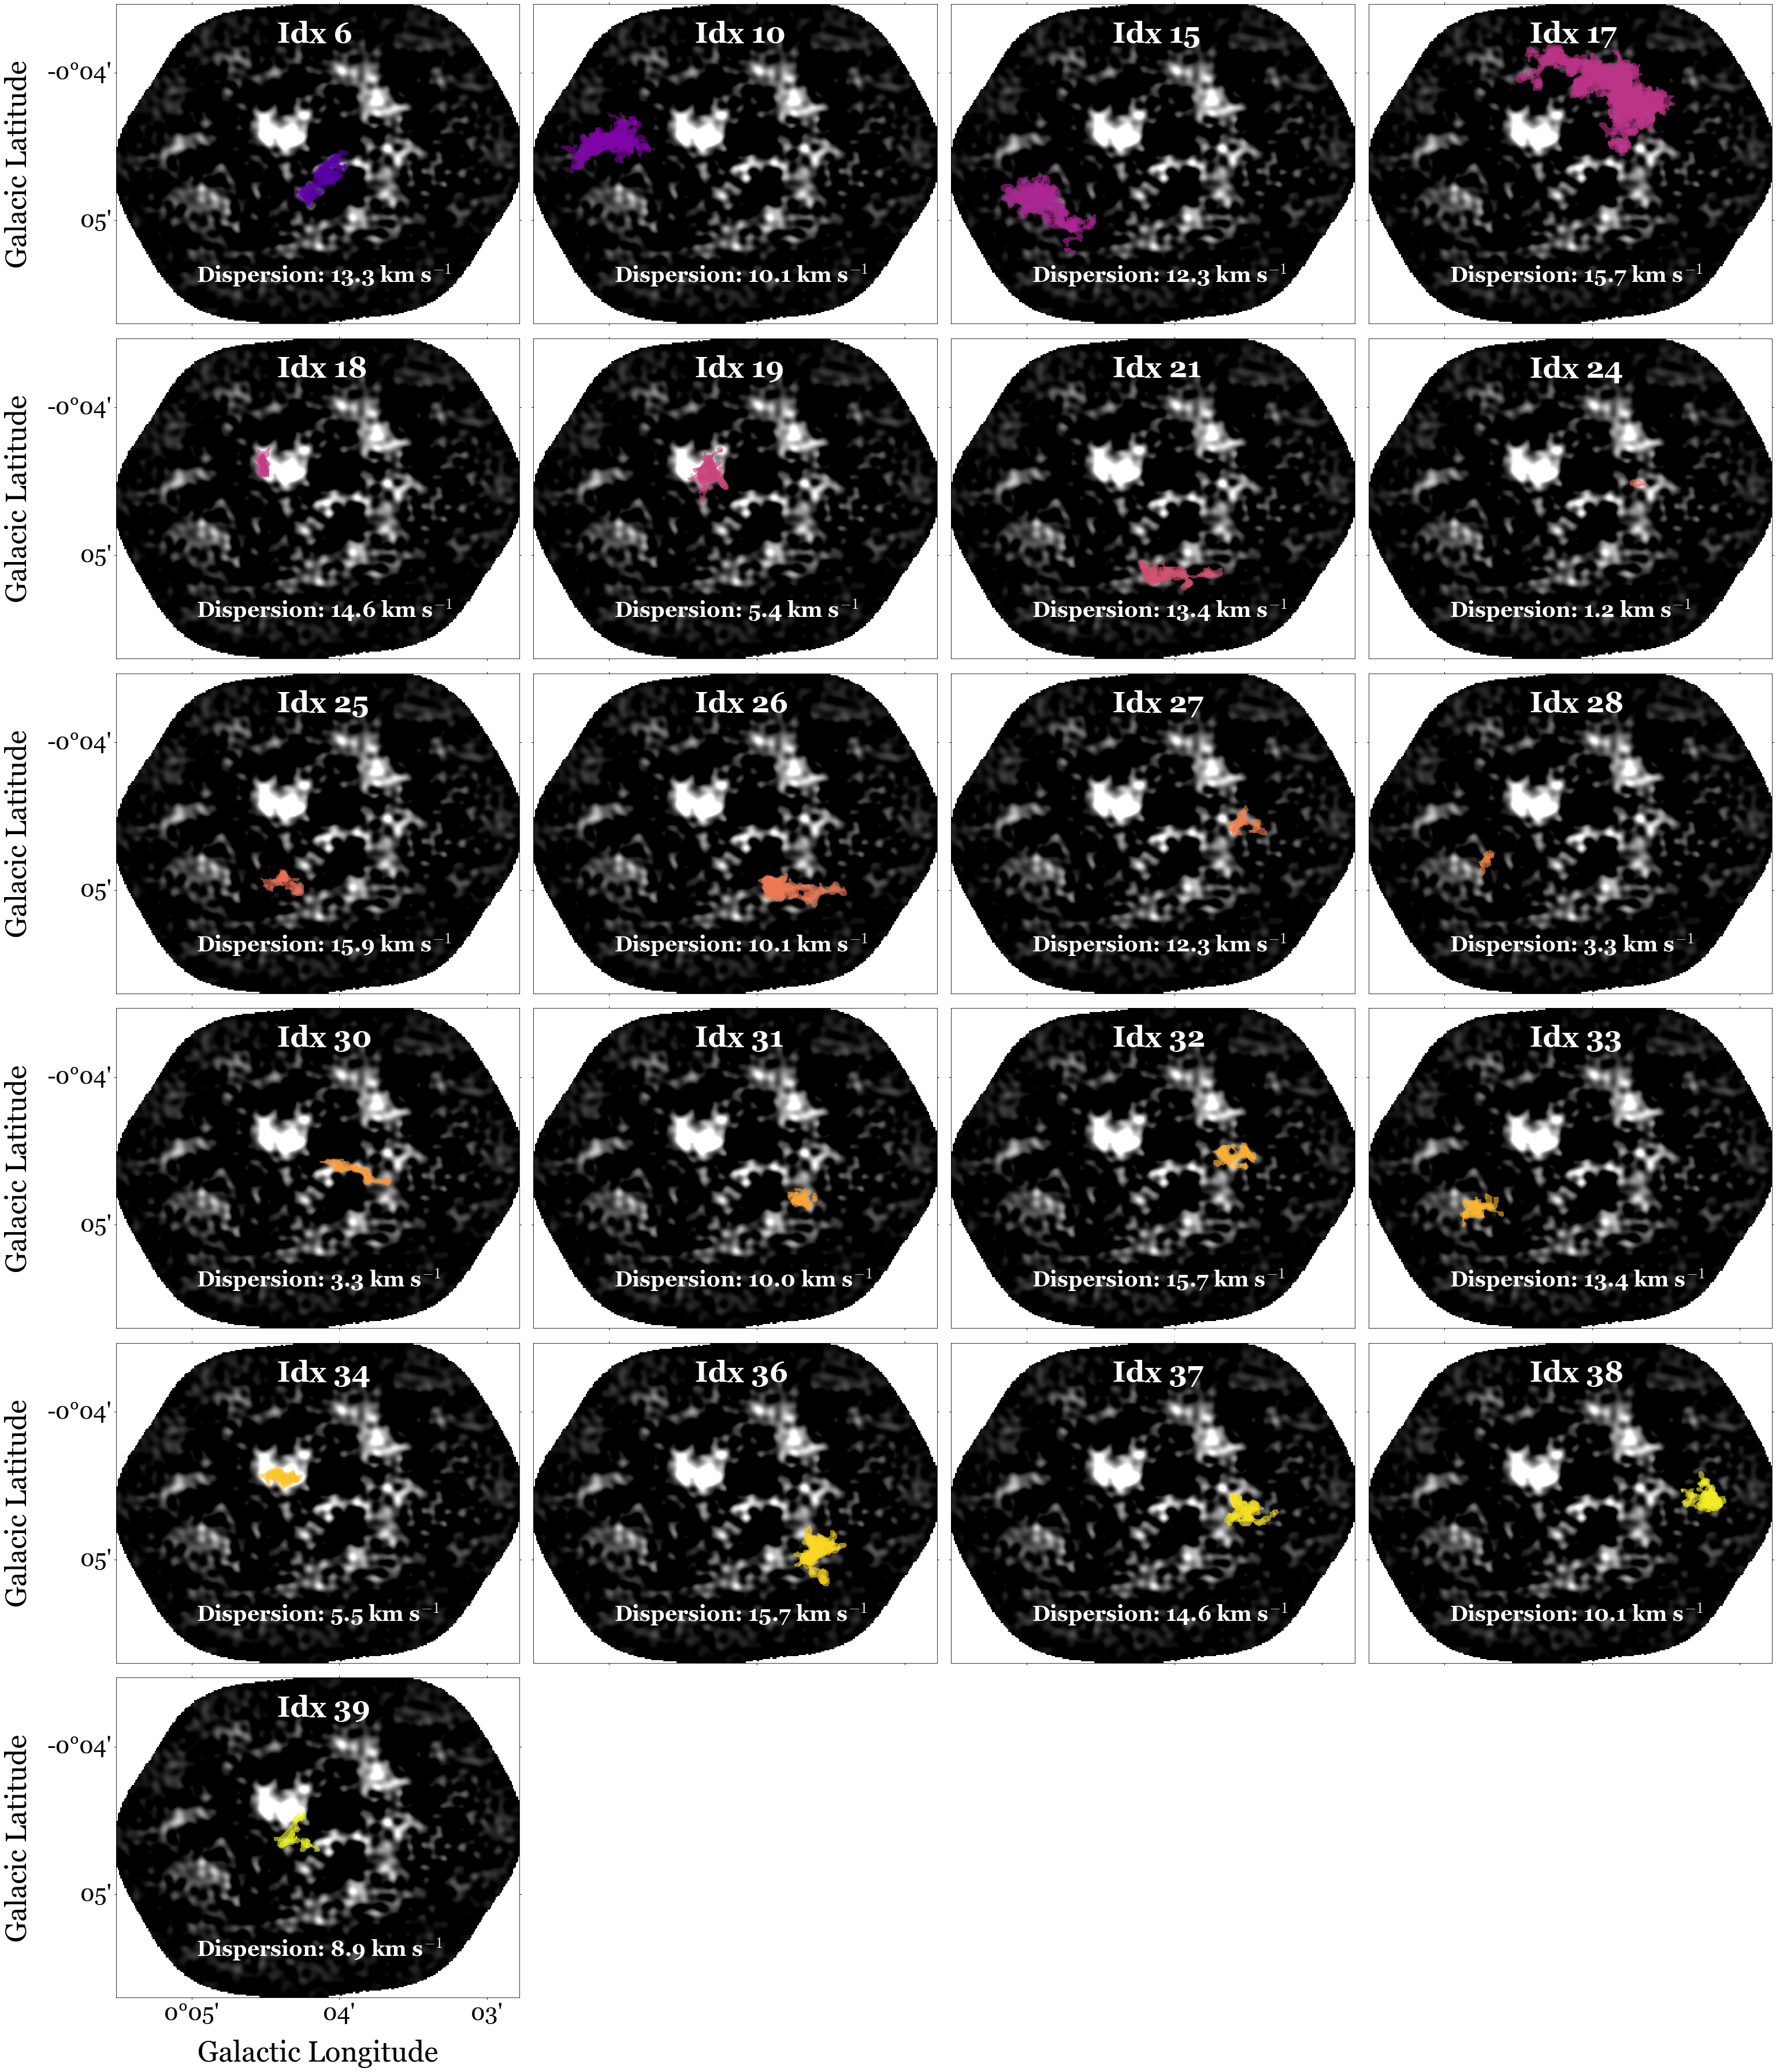

In [150]:
mpl.rcParams['mathtext.fontset'] = "cm" 
mpl.rcParams['font.family'] = "georgia"

leaves = np.arange(len(leaves_idx))+1
cmap = cm.get_cmap('plasma')
array = np.linspace(.2,1,len(leaves_idx))
color_leaves = cmap(array)
dispersions={'6':13.3,'10':10.1,'15':12.3,'27':12.3,'18':14.6,'31':10.0,'32':15.7,'38':10.1,'34':5.5,'19':5.4,
                '17':15.7,'24':1.2,'36':15.7,'33':13.4,'26':10.1,'30':3.3,'28':3.3, '21':13.4,'25':15.9,'39':8.9,'37':14.6}

# Define leaves and colormap
cmap_full = cm.get_cmap('plasma')
array_full = np.linspace(0, 1, 40)
color_leaves_full = cmap(array_full)

fig = plt.figure(figsize=(43,50))
row = 6
col = 4
for j in range(len(leaves_idx)):
    trunk = 'dendrograms/leaf_idx_{}_mask.fits'.format(leaves_idx[j])
    hdu_trunk = fits.open(trunk)[0]
    wcs_trunk = WCS(hdu_trunk)
    ax = fig.add_subplot(row, col, j + 1, projection=wcs_trunk.dropaxis(2))
    lon = ax.coords[0]
    lat = ax.coords[1]
    ax.imshow(hdu_h2co_int.data, vmin=0.0, vmax=4, cmap='gray', origin='lower')
    

    for i in range(num_vel):  # 247 is number of velocities for full H2CO, 40 for 34_70 KM/S
        masked = np.where(hdu_trunk.data[i] != 1, hdu_trunk.data[i], np.nan)
        ax.contourf(hdu_trunk.data[i], masked, levels=[.99, 1.01], alpha=0.6,colors=[color_leaves_full[leaves_idx[j]]])
        # ax.contour(hdu_trunk.data[i], masked, levels=[1], alpha=0.3)
        #ax.contour(hdu_xray_cropped_s.data[16], levels=[3e-9], colors='red', transform=ax.get_transform(wcs_xray_cropped_s))
        #ax.contour(hdu_xray_3.data[16], levels=[7e-9], colors='pink', transform=ax.get_transform(wcs_xray_3))
    if j % col == 0:  # Leftmost column, show y-axis
        ax.set_ylabel("Galacic Latitude",fontsize=50)
        lon.set_ticklabel(size=40)
        lat.set_ticklabel(size=40)
    else:  # Hide y-axis on other columns
        lat.set_ticklabel_visible(False)
        lat.set_axislabel('')

    if j >= col * (row - 1):  # Bottommost row, show x-axis
        ax.set_xlabel("Galactic Longitude",fontsize=50)
        lon.set_ticklabel(size=40)
        lat.set_ticklabel(size=40)
    else:  # Hide x-axis on other rows
        lon.set_ticklabel_visible(False)
        lon.set_axislabel('')
    lat.set_major_formatter('dd:mm')
    lon.set_major_formatter('dd:mm')

    #ax.set_title('Idx {}'.format(str(leaves_idx[j])))
    ax.text(0.2, 0.13, r'Dispersion: {}'.format(str(dispersions[str(leaves_idx[j])]))+ r' km s$^{-1}$', fontsize=37, transform=ax.transAxes,color="white",weight='bold')# bbox=dict(facecolor='white', alpha=0.9)
    ax.text(0.40, 0.88, 'Idx {}'.format(str(leaves_idx[j])), fontsize=50, transform=ax.transAxes,color="white",weight='bold')# bbox=dict(facecolor='white', alpha=0.9)
plt.tight_layout(pad=0.05, w_pad=0.05, h_pad=0.0)
plt.show()

In [151]:
fig.savefig("appendix_leaves_dispersion.pdf", dpi=500, bbox_inches="tight")

/var/folders/8n/_rhj_p6j11j3hj9wn3tzy0280000gn/T/ipykernel_8924/1210514661.py:99: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.05, w_pad=0.05, h_pad=0.0)


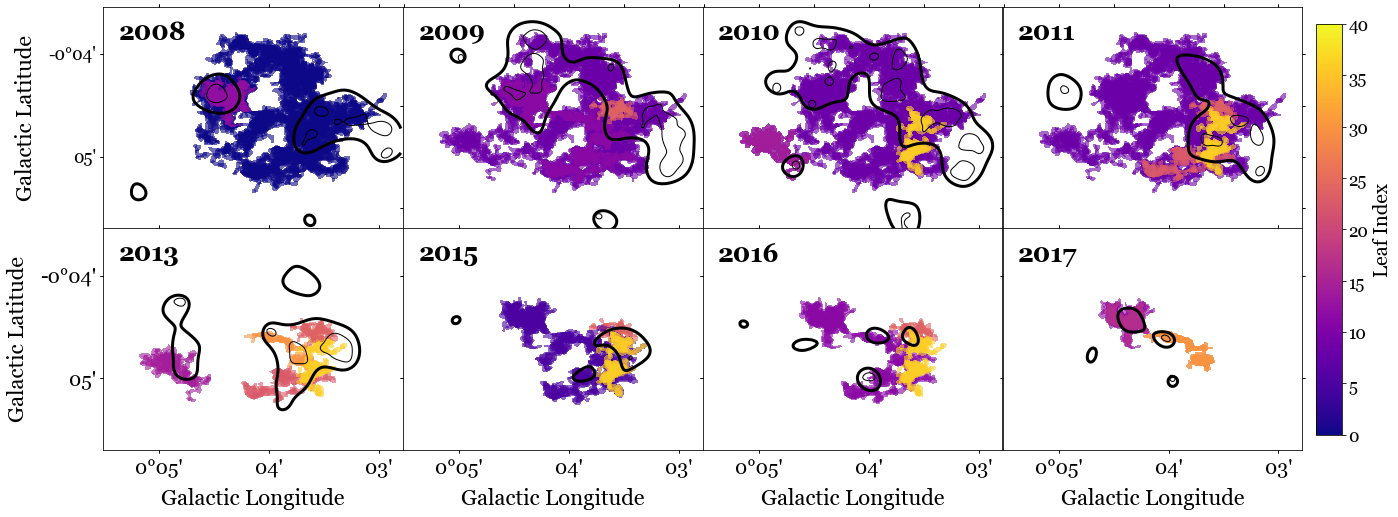

In [70]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Set plot style
mpl.rcParams['mathtext.fontset'] = "cm"
mpl.rcParams['font.family'] = "georgia"

selected_leaves_idx = [[0,12],
                        [8,12,11,23],
                        [23,8,35,14],
                        [8,23,22,35],
                        [29,22,35,23,14],
                        [23,5,35],
                        [11,23,35],
                        [29,12,16,29]


]
num_vel=40
nm_leaves=[21,25]
# Define leaves and colormap
gray_cmap = cm.get_cmap('gray')
nm_array = np.linspace(0, 1, len(nm_leaves)+1)
nm_color_leaves = gray_cmap(nm_array)

# Define leaves and colormap
cmap = cm.get_cmap('plasma')
array = np.linspace(0, 1, len(leaves_idx))
color_leaves = cmap(array)

# Define leaves and colormap
cmap_full = cm.get_cmap('plasma')
array_full = np.linspace(0, 1, 40)
color_leaves_full = cmap(array_full)

fig = plt.figure(figsize=(18, 7))
row = 2
col = 4
xray_year=[2008,2009,2010,2011,2013,2015,2016,2017]

for j in range(row * col):
    ax = fig.add_subplot(row, col, j + 1, projection=wcs_h2co.dropaxis(2))
    lon = ax.coords[0]
    lat = ax.coords[1]

    # Plot contours for each leaf
    for k in range(len(selected_leaves_idx[j])):
        trunk = 'dendrograms/branches_idx_{}_mask.fits'.format(selected_leaves_idx[j][k])
        hdu_trunk = fits.open(trunk)[0]
        
        for i in range(num_vel):  # Adjust for your specific number of velocities
            masked = np.where(hdu_trunk.data[i] != 1, hdu_trunk.data[i], np.nan)
            index=str([])
            ax.contourf(hdu_trunk.data[i], masked, levels=[0.99, 1.01], alpha=0.6, colors=[color_leaves_full[selected_leaves_idx[j][k]]])
        
    # Plot additional contours
    ax.contour(hdu_xray_4.data[9+j], levels=[3e-9], colors='k', transform=ax.get_transform(wcs_xray_4.dropaxis(2)), linewidths=3)
    ax.contour(hdu_xray_3.data[9+j], levels=[7e-9], colors='k', transform=ax.get_transform(wcs_xray_3.dropaxis(2)), linewidths=1)
    ax.text(0.05, 0.85, str(round(xray_year[j])), fontsize=25, transform=ax.transAxes,color="k",weight='bold')# bbox=dict(facecolor='white', alpha=0.9)
    
    # Set axis labels only for edge subplots
    if j % col == 0:  # Leftmost column, show y-axis
        ax.set_ylabel("Galactic Latitude", fontsize=22)
        lon.set_ticklabel(size=17)
        lat.set_ticklabel(size=17)
        lat.set_major_formatter('dd:mm')
        lon.set_major_formatter('dd:mm')
    else:  # Hide y-axis on other columns
        lat.set_ticklabel_visible(False)
        lat.set_axislabel('')


    if j >= col * (row - 1):  # Bottom row, show x-axis
        ax.set_xlabel("Galactic Longitude", fontsize=22)
        lon.set_ticklabel(size=20)
        lat.set_ticklabel(size=20)
        lat.set_major_formatter('dd:mm')
        lon.set_major_formatter('dd:mm')
    else:  # Hide x-axis on other rows
        lon.set_ticklabel_visible(False)
        lon.set_axislabel('')

# Set up the colorbar for the leaves using ScalarMappable
norm = mcolors.Normalize(vmin=0, vmax=40)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # This is required for ScalarMappable to work with colorbar

# Add a colorbar for the contour colors
cbar_ax = fig.add_axes([1.01, 0.15, 0.02, 0.815])
cbar = fig.colorbar(sm, ax=fig.axes, orientation='vertical', cax=cbar_ax)
cbar.set_label('Leaf Index', fontsize=20)
cbar.ax.tick_params(labelsize=17)

plt.tight_layout(pad=0.05, w_pad=0.05, h_pad=0.0)
plt.show()


In [ ]:
selected_branches_idx=[9,11,12,13,14,16,20,22,29]

In [71]:
fig.savefig('selected_branches.pdf')

In [169]:
branches_idx

[2, 1, 8, 0, 3, 4, 7, 23, 5, 9, 13, 11, 20, 29, 22, 12, 16, 35, 14]

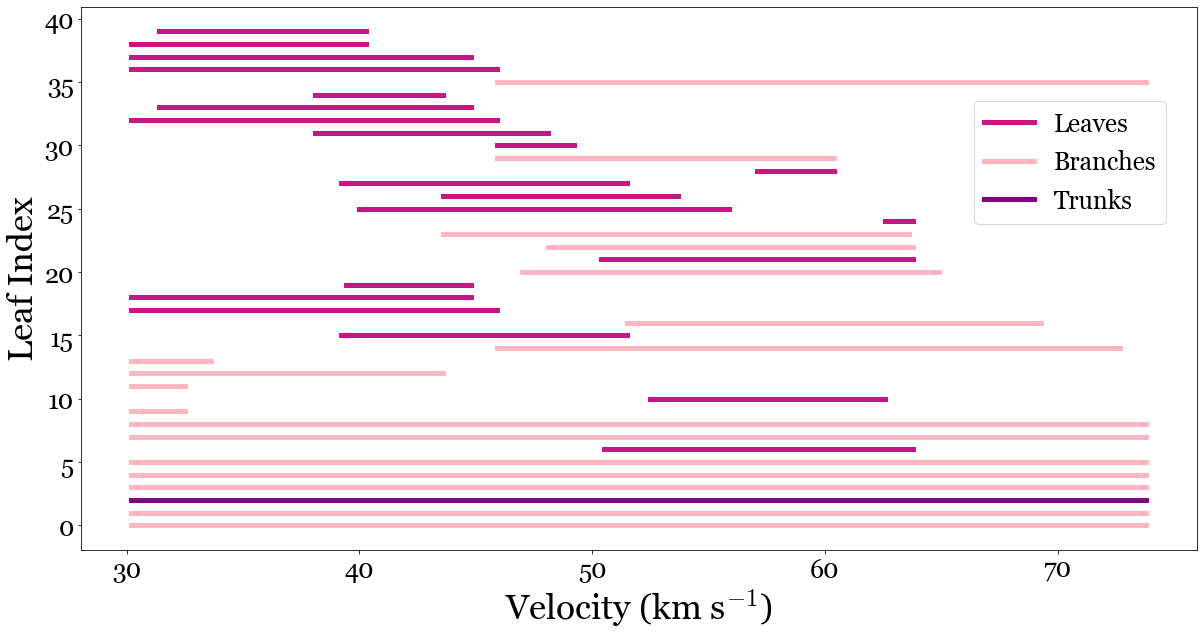

In [197]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

velocity_start = {'6':50.5, '10':52.5, '15':39.2, '27':39.2, '18':30.2, '31':38.1, '32':30.2, '38':30.2, '34':38.1, '19':39.4,
                  '17':30.2, '24':62.6, '36':30.2, '33':31.4, '26':43.6, '30':45.9, '28':57.1, '21':50.4, '25':40.0, '39':31.4, '37':30.2}
dispersions = {'6':13.3, '10':10.1, '15':12.3, '27':12.3, '18':14.6, '31':10.0, '32':15.7, '38':10.1, '34':5.5, '19':5.4,
               '17':15.7, '24':1.2, '36':15.7, '33':13.4, '26':10.1, '30':3.3, '28':3.3, '21':13.4, '25':15.9, '39':8.9, '37':14.6}

velocities_trunks = {'1':[30.2, 73.8], '8':[30.2, 73.8], '0':[30.2, 73.8], '3':[30.2, 73.8], '4':[30.2, 73.8], '7':[30.2, 73.8], 
                     '23':[63.6, 43.6], '5':[30.2, 73.8], '9':[30.2, 32.5], '13':[30.2, 33.6], '11':[30.2, 32.5], '20':[64.9, 47.0],
                     '29':[60.4, 45.9], '22':[63.8, 48.1], '12':[30.2, 43.6], '16':[69.3, 51.5], '35':[45.9, 73.8], '14':[72.7, 45.9]}

trunk_velocities = {'2':[30.2, 73.8]}

# Define leaves and colormap
cmap_full = cm.get_cmap('plasma')
array_full = np.linspace(0, 1, 40)
color_leaves_full = cmap(array_full)

# Plot leaves
for i, leaf_idx in enumerate(leaves_idx):
    leaf_key = str(leaf_idx)
    ax.plot(
        [velocity_start[leaf_key], velocity_start[leaf_key] + dispersions[leaf_key]], 
        [leaf_idx, leaf_idx], 
        linestyle='-', linewidth=5, color='mediumvioletred'
    )

# Plot branches
for i, branch_idx in enumerate(branches_idx):
    leaf_key = str(branch_idx)
    if leaf_key == '2':
        continue 
    ax.plot(
        [velocities_trunks[leaf_key][0], velocities_trunks[leaf_key][1]], 
        [branch_idx, branch_idx], 
        linestyle='-', linewidth=5, color='lightpink'
    )

# Plot trunk
ax.plot([30.2, 73.8], [2, 2], linestyle='-', linewidth=5, color='purple')

# Create dummy lines for the legend
ax.plot([], [], linestyle='-', linewidth=5, color='mediumvioletred', label='Leaves')
ax.plot([], [], linestyle='-', linewidth=5, color='lightpink', label='Branches')
ax.plot([], [], linestyle='-', linewidth=5, color='purple', label='Trunks')

# Display legend with correct labels and colors
ax.legend(fontsize=25,loc=[.8,.6])

# Add axis labels
ax.set_xlabel(r"Velocity (km s$^{-1}$)", fontsize=35)
ax.set_ylabel("Leaf Index", fontsize=35)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.show()


In [198]:
fig.savefig("appendix_velocities_full.pdf", dpi=500, bbox_inches="tight")

In [80]:
branches_idx = [branch.idx for branch in d.all_structures if branch.is_branch]
#trunks_idx = [trunk.idx for leaf in d.trunk]


In [422]:
#d = Dendrogram.compute(hdu_h2co.data,wcs=wcs_h2co.dropaxis(2),min_value=3*one_sigma,min_delta=4*one_sigma,min_npix=beam_size_pix)
for i in range(len(branches_idx)):
    structure = d[branches_idx[i]]

    mask = structure.get_mask()
    mask_hdu = fits.PrimaryHDU(mask.astype('short'), hdu_h2co_int[0].header)
    hdu_masked = fits.HDUList([mask_hdu])
    hdu_masked.writeto('dendrograms/branches_idx_{}_mask.fits'.format(branches_idx[i]), overwrite=True)

[2, 1, 8, 0, 3, 4, 7, 23, 5, 9, 13, 11, 20, 29, 22, 12, 16, 35, 14]


In [5]:
indexes = [21, 25, 39]
for index in indexes:
    trunk = 'dendrograms/leaf_idx_{}_mask.fits'.format(index)
    hdu_trunk = fits.open(trunk)[0]

    # Initialize h2co_int
    for i in range(0, 40, 1):
        if i == 0:
            h2co_int = hdu_trunk.data[i].astype(float)  # Ensure numerical type
        else:
            h2co_int = h2co_int + hdu_trunk.data[i].astype(float)

    # Prepare the header and save the result
    header = wcs_h2co.dropaxis(2).to_header()
    result = h2co_int  # Define result
    mask_hdu = fits.PrimaryHDU(result, header)
    hdu_masked = fits.HDUList([mask_hdu])
    hdu_masked.writeto('leaves_idx_{}_mask_int.fits'.format(index), overwrite=True)


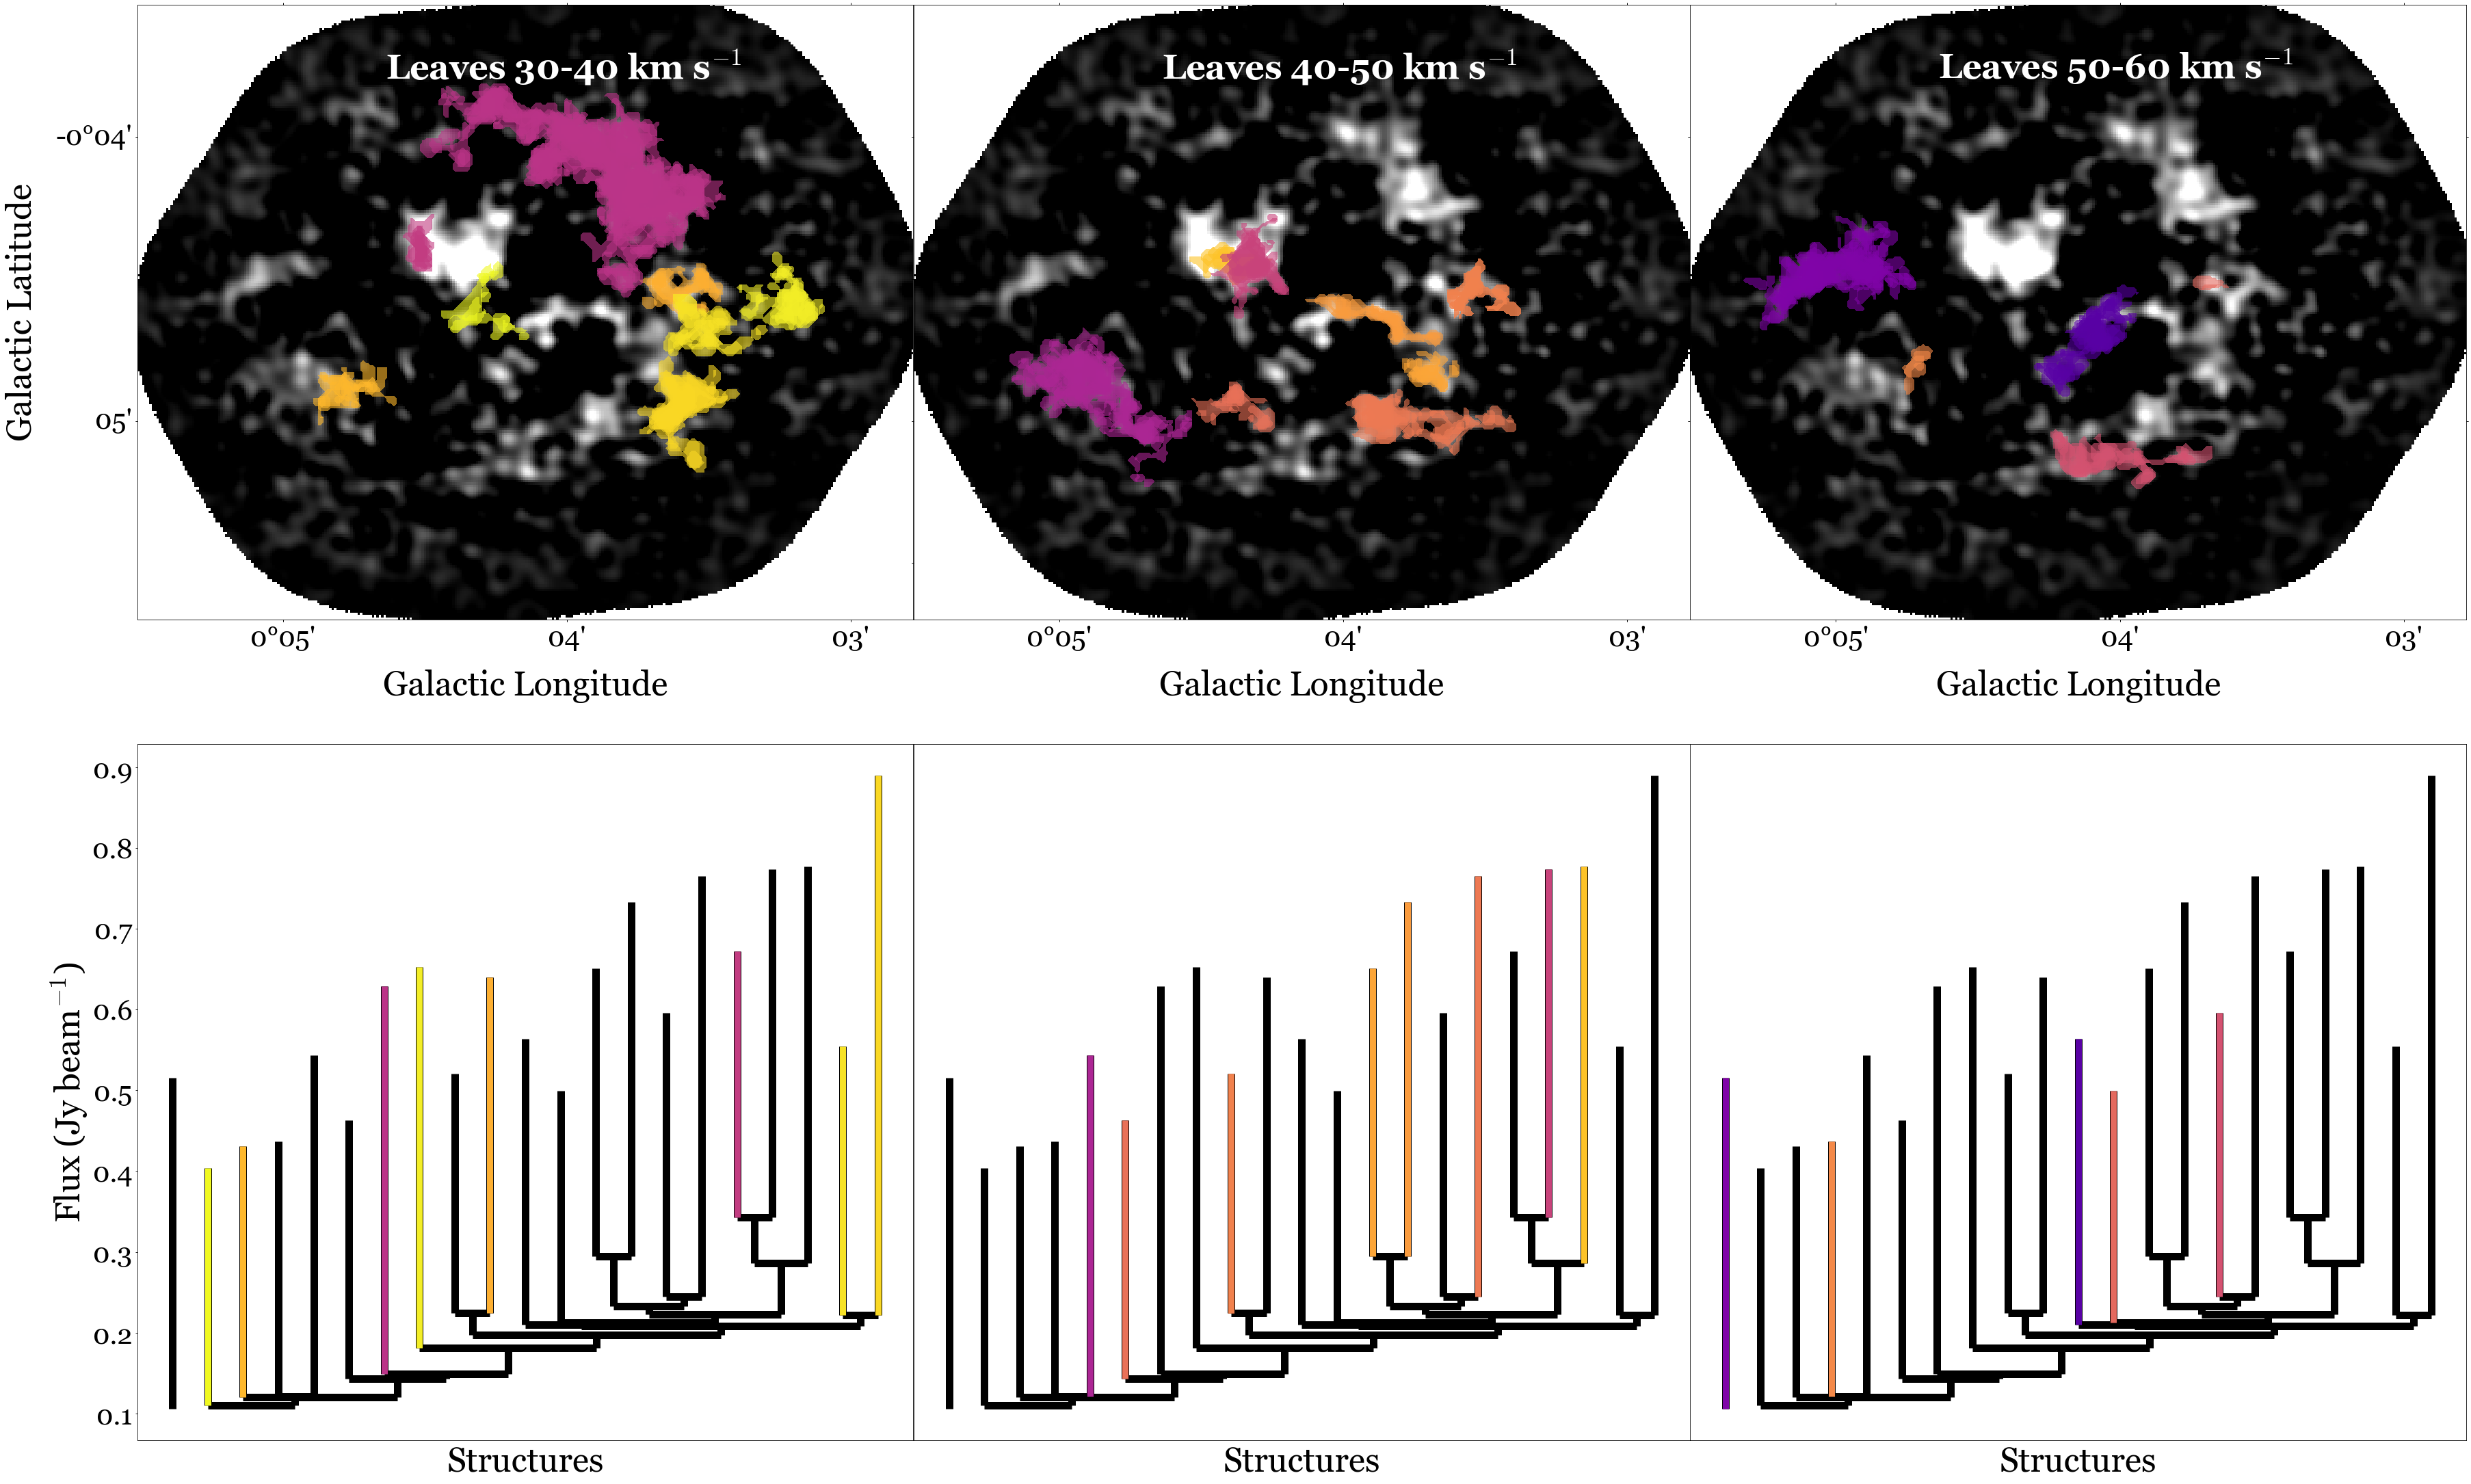

In [22]:
leaves_30_40=[18,32,38,39,17,36,33,37]
leaves_40_50=[27,31,34,19,15,26,27,30,25]
leaves_50_60=[28,21,24,10,6]

fig = plt.figure(figsize=(50,30))
ax = fig.add_subplot(231, projection=wcs_h2co.dropaxis(2))
lon = ax.coords[0]
lat = ax.coords[1]
ax.imshow(hdu_h2co_int.data, vmin=0.0, vmax=4, cmap='gray', origin='lower')

for k in range(len(leaves_30_40)):
        trunk = 'dendrograms/leaf_idx_{}_mask.fits'.format(leaves_30_40[k])
        hdu_trunk = fits.open(trunk)[0]
        
        for i in range(40):  # Adjust for your specific number of velocities
            masked = np.where(hdu_trunk.data[i] != 1, hdu_trunk.data[i], np.nan)
            index=str([])
            ax.contourf(hdu_trunk.data[i], masked, levels=[0.99, 1.01], alpha=0.6, colors=[color_leaves_full[leaves_30_40[k]]])
ax.set_ylabel("Galactic Latitude",fontsize=50)
lat.set_ticklabel(size=40)
lat.set_major_formatter('dd:mm')
ax.set_xlabel("Galactic Longitude",fontsize=50)
lon.set_ticklabel(size=40)
lon.set_major_formatter('dd:mm')
ax.text(0.32, 0.88, r'Leaves 30-40 km s$^{-1}$', fontsize=50, transform=ax.transAxes,color="white",weight='bold')# bbox=dict(facecolor='white', alpha=0.9)


ax = fig.add_subplot(232, projection=wcs_h2co.dropaxis(2))
lon = ax.coords[0]
lat = ax.coords[1]
ax.imshow(hdu_h2co_int.data, vmin=0.0, vmax=4, cmap='gray', origin='lower')

for k in range(len(leaves_40_50)):
        trunk = 'dendrograms/leaf_idx_{}_mask.fits'.format(leaves_40_50[k])
        hdu_trunk = fits.open(trunk)[0]
        
        for i in range(40):  # Adjust for your specific number of velocities
            masked = np.where(hdu_trunk.data[i] != 1, hdu_trunk.data[i], np.nan)
            index=str([])
            ax.contourf(hdu_trunk.data[i], masked, levels=[0.99, 1.01], alpha=0.6, colors=[color_leaves_full[leaves_40_50[k]]])
lat.set_ticklabel_visible(False)
lat.set_axislabel('')

ax.set_xlabel("Galactic Longitude",fontsize=50)
lon.set_ticklabel(size=40)
lon.set_major_formatter('dd:mm')
ax.text(0.32, 0.88, r'Leaves 40-50 km s$^{-1}$', fontsize=50, transform=ax.transAxes,color="white",weight='bold')# bbox=dict(facecolor='white', alpha=0.9)



ax = fig.add_subplot(233, projection=wcs_h2co.dropaxis(2))
lon = ax.coords[0]
lat = ax.coords[1]
ax.imshow(hdu_h2co_int.data, vmin=0.0, vmax=4, cmap='gray', origin='lower')

for k in range(len(leaves_50_60)):
        trunk = 'dendrograms/leaf_idx_{}_mask.fits'.format(leaves_50_60[k])
        hdu_trunk = fits.open(trunk)[0]
        
        for i in range(40):  # Adjust for your specific number of velocities
            masked = np.where(hdu_trunk.data[i] != 1, hdu_trunk.data[i], np.nan)
            index=str([])
            ax.contourf(hdu_trunk.data[i], masked, levels=[0.99, 1.01], alpha=0.6, colors=[color_leaves_full[leaves_50_60[k]]])
lat.set_major_formatter('dd:mm')
lon.set_major_formatter('dd:mm')
lat.set_ticklabel_visible(False)
lat.set_axislabel('')
ax.text(0.32, 0.88, r'Leaves 50-60 km s$^{-1}$', fontsize=50, transform=ax.transAxes,color="white",weight='bold')# bbox=dict(facecolor='white', alpha=0.9)
lat.set_ticklabel_visible(False)
lat.set_axislabel('')

ax.set_xlabel("Galactic Longitude",fontsize=50)
lon.set_ticklabel(size=40)
lon.set_major_formatter('dd:mm')
plt.tight_layout(pad=0.05, w_pad=0.05, h_pad=0.0)

ax = fig.add_subplot(234)
# Plot the whole tree
p.plot_tree(ax, color='black', lw=11)

# Plot each leaf with its corresponding color
for i in range(len(leaves_30_40)):
    p.plot_tree(ax, [leaves_30_40[i]], color=[color_leaves_full[leaves_30_40[i]]], lw=9)
ax.set_xticks([])
ax.set_ylabel(r"Flux (Jy beam$^{-1}$)", fontsize=50)
ax.set_xlabel("Structures", fontsize=50)
plt.tick_params(axis='both', which='major', labelsize=40)

ax = fig.add_subplot(235)
# Plot the whole tree
p.plot_tree(ax, color='black', lw=11)

# Plot each leaf with its corresponding color
for i in range(len(leaves_40_50)):
    p.plot_tree(ax, [leaves_40_50[i]], color=[color_leaves_full[leaves_40_50[i]]], lw=9)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("Structures", fontsize=50)
ax = fig.add_subplot(236)
# Plot the whole treea
p.plot_tree(ax, color='black', lw=11)

# Plot each leaf with its corresponding color
for i in range(len(leaves_50_60)):
    p.plot_tree(ax, [leaves_50_60[i]], color=[color_leaves_full[leaves_50_60[i]]], lw=9)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("Structures", fontsize=50)
plt.show()


In [12]:
import matplotlib.patheffects as pe
import skimage.measure as measure
import skimage as ski
from skimage.draw import polygon2mask

In [14]:
xray = "Xray_Clavel_chandra_pigs_cube_smoothed_4k_updated_stone_only.fits"
hdu_xray      = fits.open(xray)[0]
wcs_xray = WCS(hdu_xray.header)

wcs_xray_2axis=wcs_xray.dropaxis(2)

/Users/danyaalboslani/opt/anaconda3/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:254: UserWarning: No contour levels were found within the data range.
  cset = super().contour(*args, **kwargs)
/Users/danyaalboslani/opt/anaconda3/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:254: UserWarning: No contour levels were found within the data range.
  cset = super().contour(*args, **kwargs)
/Users/danyaalboslani/opt/anaconda3/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:254: UserWarning: No contour levels were found within the data range.
  cset = super().contour(*args, **kwargs)


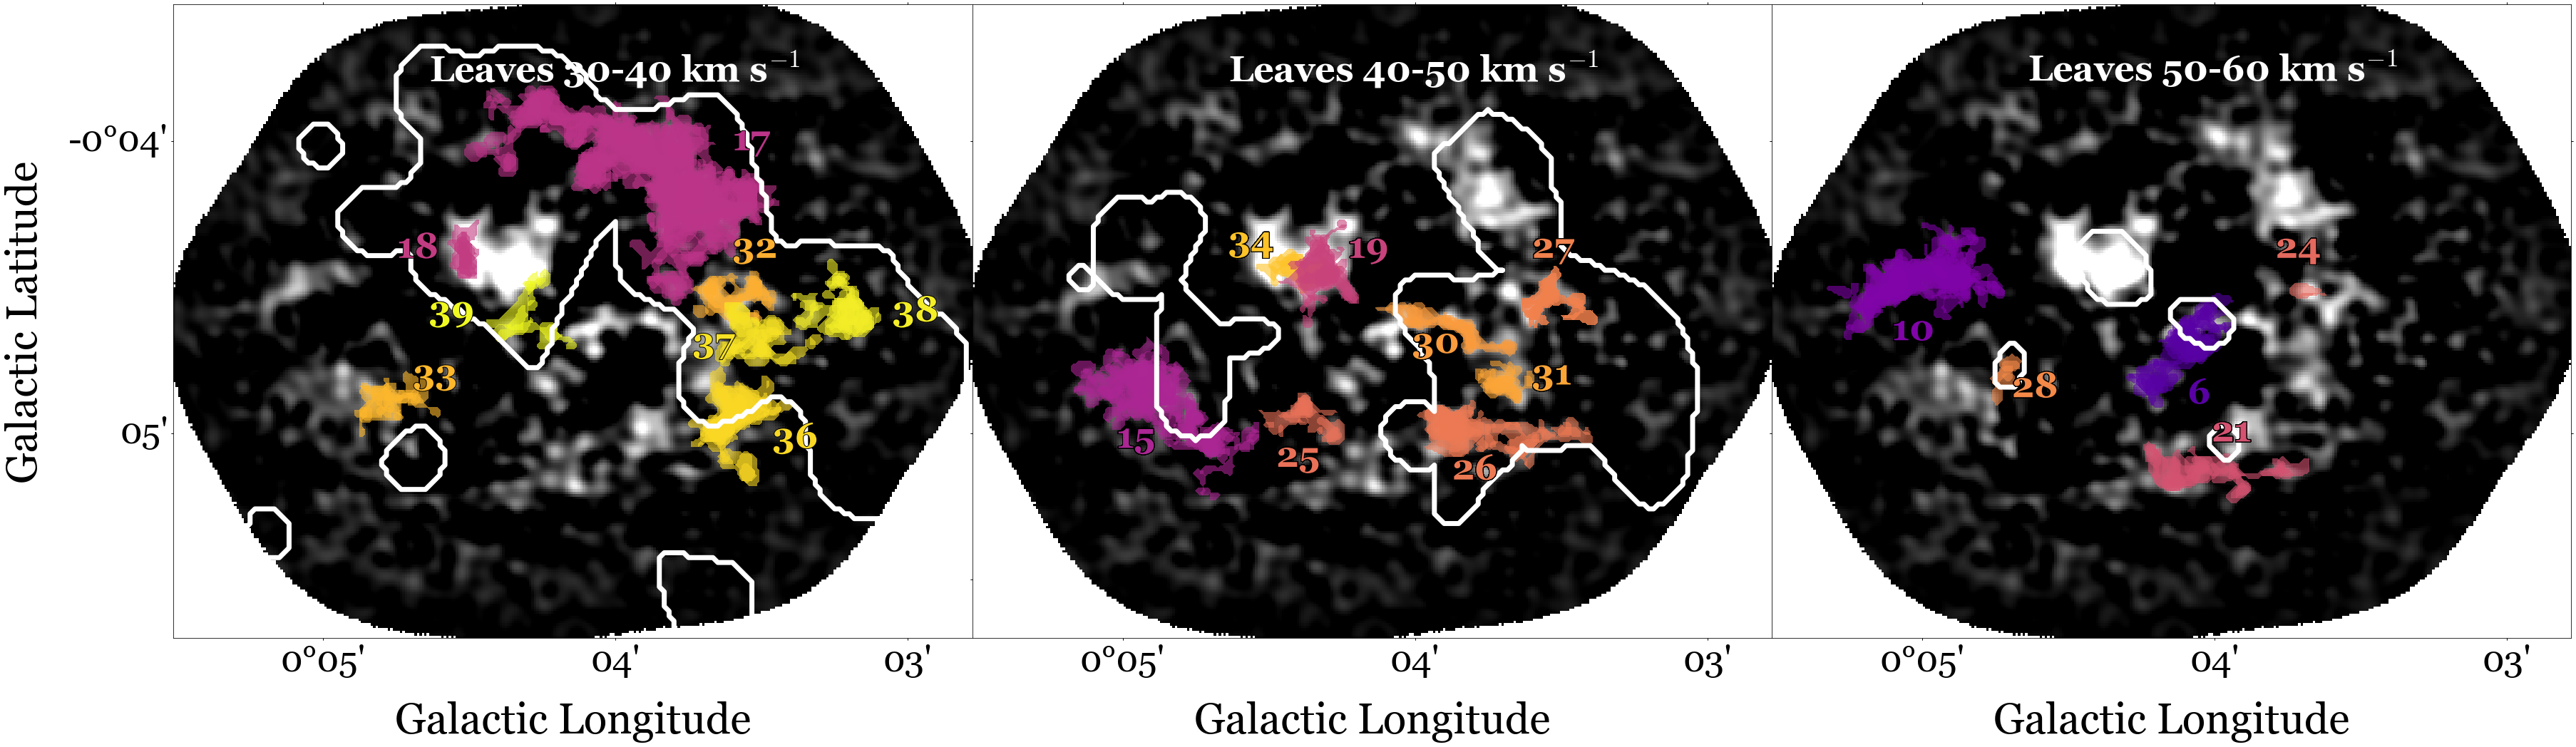

In [18]:
leaves_30_40=[18,32,38,39,17,36,33,37]
coord_30_40=[[.28,.6],[.7,.6],[.9,.5],[.32,.5],[.7,.77],[.75,.3],[.3,.4],[.65,.45]]
leaves_40_50=[27,31,34,19,15,26,27,30,25]
coord_40_50=[[.7,.6],[.7,.4],[.32,.61],[.47,.6],[.18,.3],[.6,.25],[.7,.6],[.55,.45],[.38,.27]]
leaves_50_60=[28,21,24,10,6]
coord_50_60=[[.3,.38],[.55,.31],[.63,.6],[.15,.47],[.52,.37]]
# Define leaves and colormap
cmap_full = cm.get_cmap('plasma')
array_full = np.linspace(0, 1, 40)
color_leaves_full = cmap(array_full)
fig = plt.figure(figsize=(50,30))
ax = fig.add_subplot(131, projection=wcs_h2co.dropaxis(2))
lon = ax.coords[0]
lat = ax.coords[1]
ax.imshow(hdu_h2co_int.data, vmin=0.0, vmax=4, cmap='gray', origin='lower')

for k in range(len(leaves_30_40)):
    trunk = 'dendrograms/leaf_idx_{}_mask.fits'.format(leaves_30_40[k])
    hdu_trunk = fits.open(trunk)[0]
    for i in range(40):  # Adjust for your specific number of velocities
        masked = np.where(hdu_trunk.data[i] != 1, hdu_trunk.data[i], np.nan)
        ax.contourf(hdu_trunk.data[i], masked, levels=[0.99, 1.01], alpha=0.6, colors=[color_leaves_full[leaves_30_40[k]]])
    ax.text(coord_30_40[k][0],coord_30_40[k][1], str(leaves_30_40[k]), fontsize=50, path_effects=[pe.withStroke(linewidth=2, foreground="black")],transform=ax.transAxes,color=color_leaves_full[leaves_30_40[k]],weight='bold')# bbox=dict(facecolor='white', alpha=0.9)
ax.set_ylabel("Galactic Latitude",fontsize=60)
lat.set_ticklabel(size=50)
lat.set_major_formatter('dd:mm')
ax.set_xlabel("Galactic Longitude",fontsize=60)
lon.set_ticklabel(size=50)
lon.set_major_formatter('dd:mm')


xray_start= 9
mask_list_1=[]

for year in range(3):
    contours = measure.find_contours(hdu_xray.data[xray_start+year], 3e-9)
    for i in contours:
        mask = ski.draw.polygon2mask(hdu_xray.data[xray_start+year].shape, i)
        mask_tot_1=mask.astype(int)
        mask_list_1.append(mask_tot_1)

mask_tot_1 = np.zeros(np.shape(hdu_xray.data[0]))
for year in range(len(mask_list_1)):
    mask_tot_1 += mask_list_1[year]
    
mask_tot_1[mask_tot_1 > 0] = 1
    
result_1 = mask_tot_1
ax.contour(result_1, levels=[1], transform=ax.get_transform(wcs_xray_2axis), colors='white', linewidths=7)
ax.text(0.32, 0.88, r'Leaves 30-40 km s$^{-1}$', fontsize=50, transform=ax.transAxes,color="white",weight='bold')# bbox=dict(facecolor='white', alpha=0.9)

ax = fig.add_subplot(132, projection=wcs_h2co.dropaxis(2))
lon = ax.coords[0]
lat = ax.coords[1]
ax.imshow(hdu_h2co_int.data, vmin=0.0, vmax=4, cmap='gray', origin='lower')

for k in range(len(leaves_40_50)):
        trunk = 'dendrograms/leaf_idx_{}_mask.fits'.format(leaves_40_50[k])
        hdu_trunk = fits.open(trunk)[0]
        
        for i in range(40):  # Adjust for your specific number of velocities
            masked = np.where(hdu_trunk.data[i] != 1, hdu_trunk.data[i], np.nan)
            ax.contourf(hdu_trunk.data[i], masked, levels=[0.99, 1.01], alpha=0.6, colors=[color_leaves_full[leaves_40_50[k]]])
            ax.text(coord_40_50[k][0],coord_40_50[k][1], str(leaves_40_50[k]), fontsize=50, path_effects=[pe.withStroke(linewidth=2, foreground="black")],transform=ax.transAxes,color=color_leaves_full[leaves_40_50[k]],weight='bold')# bbox=dict(facecolor='white', alpha=0.9)
lat.set_ticklabel_visible(False)
lat.set_axislabel('')

ax.set_xlabel("Galactic Longitude",fontsize=60)
lon.set_ticklabel(size=50)
lon.set_major_formatter('dd:mm')
ax.text(0.32, 0.88, r'Leaves 40-50 km s$^{-1}$', fontsize=50, transform=ax.transAxes,color="white",weight='bold')# bbox=dict(facecolor='white', alpha=0.9)
mask_list_2=[]

for year in range(4):
    contours = measure.find_contours(hdu_xray.data[12+year], 3e-9)
    for i in contours:
        mask = ski.draw.polygon2mask(hdu_xray.data[12+year].shape, i)
        mask_tot_2=mask.astype(int)
        mask_list_2.append(mask_tot_2)

mask_tot_2 = np.zeros(np.shape(hdu_xray.data[0]))
for year in range(len(mask_list_2)):
    mask_tot_2 += mask_list_2[year]
    
mask_tot_2[mask_tot_2 > 0] = 1
    
result_2 = mask_tot_2
ax.contour(result_2, levels=[1], transform=ax.get_transform(wcs_xray_2axis), colors='white', linewidths=7)



ax = fig.add_subplot(133, projection=wcs_h2co.dropaxis(2))
lon = ax.coords[0]
lat = ax.coords[1]
ax.imshow(hdu_h2co_int.data, vmin=0.0, vmax=4, cmap='gray', origin='lower')

for k in range(len(leaves_50_60)):
        trunk = 'dendrograms/leaf_idx_{}_mask.fits'.format(leaves_50_60[k])
        hdu_trunk = fits.open(trunk)[0]
        
        for i in range(40):  # Adjust for your specific number of velocities
            masked = np.where(hdu_trunk.data[i] != 1, hdu_trunk.data[i], np.nan)
            ax.contourf(hdu_trunk.data[i], masked, levels=[0.99, 1.01], alpha=0.6, colors=[color_leaves_full[leaves_50_60[k]]])
            ax.text(coord_50_60[k][0],coord_50_60[k][1], str(leaves_50_60[k]), fontsize=50, path_effects=[pe.withStroke(linewidth=2, foreground="black")],transform=ax.transAxes,color=color_leaves_full[leaves_50_60[k]],weight='bold')# bbox=dict(facecolor='white', alpha=0.9)
lat.set_major_formatter('dd:mm')
lon.set_major_formatter('dd:mm')
lat.set_ticklabel_visible(False)
lat.set_axislabel('')
ax.text(0.32, 0.88, r'Leaves 50-60 km s$^{-1}$', fontsize=50, transform=ax.transAxes,color="white",weight='bold')# bbox=dict(facecolor='white', alpha=0.9)
lat.set_ticklabel_visible(False)
lat.set_axislabel('')
mask_list_3=[]

for year in range(1):
    contours = measure.find_contours(hdu_xray.data[16+year], 3e-9)
    for i in contours:
        mask = ski.draw.polygon2mask(hdu_xray.data[16+year].shape, i)
        mask_tot_3=mask.astype(int)
        mask_list_3.append(mask_tot_3)

mask_tot_3 = np.zeros(np.shape(hdu_xray.data[0]))
for year in range(len(mask_list_3)):
    mask_tot_3 += mask_list_3[year]
    
mask_tot_3[mask_tot_3 > 0] = 1
    
result_3 = mask_tot_3
ax.contour(result_3, levels=[1], transform=ax.get_transform(wcs_xray_2axis), colors='white', linewidths=7)

ax.set_xlabel("Galactic Longitude",fontsize=60)
lon.set_ticklabel(size=50)
lon.set_major_formatter('dd:mm')
plt.tight_layout(pad=0.05, w_pad=0.05, h_pad=0.0)

In [19]:
fig.savefig("appendix_split_velocity_ranges_no_tree_xray.pdf", dpi=500, bbox_inches="tight")

In [88]:
fig.savefig("appendix_branches.pdf", dpi=500, bbox_inches="tight")

In [450]:
print(len(branches_idx)+len(leaves_idx)+len(trunks_idx))

42


In [434]:
fig.savefig('dendrogram_branches_stone.png',bbox_inches='tight',dpi=500)

In [284]:
fig.savefig('dendrogram_leaves.pdf')

In [442]:
#d = Dendrogram.compute(hdu_h2co.data,wcs=wcs_h2co.dropaxis(2),min_value=3*one_sigma,min_delta=4*one_sigma,min_npix=beam_size_pix)
trunks = [structure for structure in d.all_structures if structure.parent is None]
trunks_idx = [structure.idx for structure in trunks]
for i in range(len(trunks_idx)):
    structure = d.trunk[i]

    mask = structure.get_mask()
    mask_hdu = fits.PrimaryHDU(mask.astype('short'), hdu_h2co_int[0].header)
    hdu_masked = fits.HDUList([mask_hdu])
    hdu_masked.writeto('dendrograms/trunk_idx_{}_mask.fits'.format(trunks_idx[i]), overwrite=True)


In [488]:
print(trunks_idx)
print(branches_idx)

[10, 2]
[2, 1, 8, 0, 3, 4, 7, 23, 5, 9, 13, 11, 20, 29, 22, 12, 16, 35, 14]


/var/folders/8n/_rhj_p6j11j3hj9wn3tzy0280000gn/T/ipykernel_44648/3310505331.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.05, w_pad=0.05, h_pad=0.0)


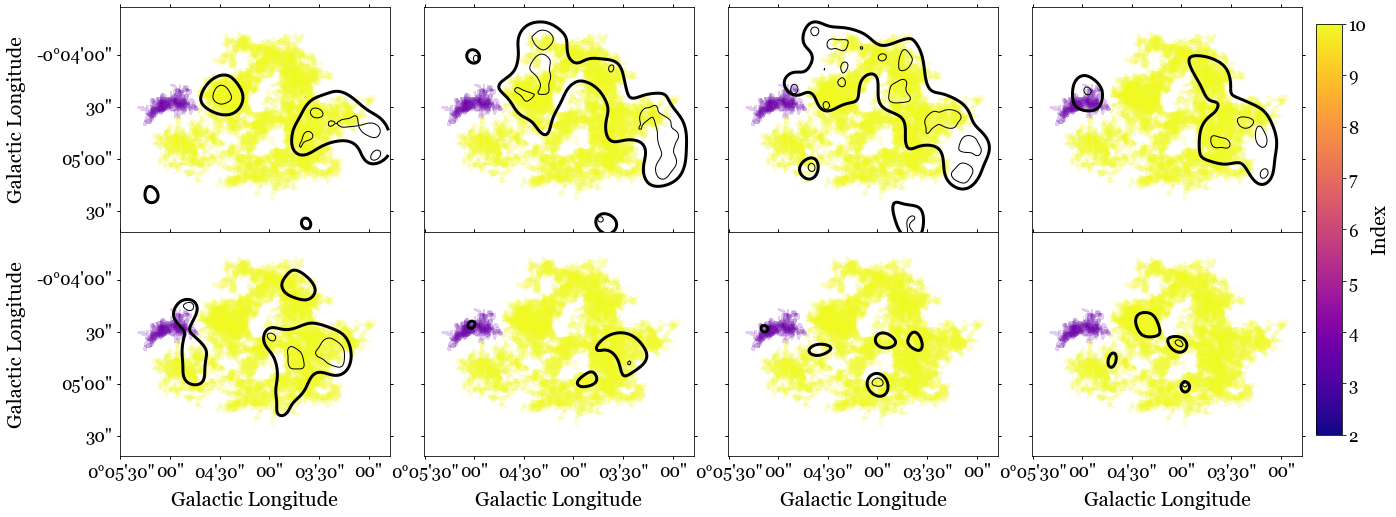

In [448]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Set plot style
mpl.rcParams['mathtext.fontset'] = "cm"
mpl.rcParams['font.family'] = "georgia"

# Define leaves and colormap
leaves = np.arange(len(trunks_idx)) + 1
cmap = cm.get_cmap('plasma')
array = np.linspace(0.2, 1, len(trunks_idx))
color_leaves = cmap(array)

fig = plt.figure(figsize=(18, 7))
row = 2
col = 4

for j in range(row * col):
    ax = fig.add_subplot(row, col, j + 1, projection=wcs_trunk.dropaxis(2))
    lon = ax.coords[0]
    lat = ax.coords[1]

    # Plot contours for each leaf
    for k in range(len(trunks_idx)):
        trunk = 'dendrograms/trunk_idx_{}_mask.fits'.format(trunks_idx[k])
        hdu_trunk = fits.open(trunk)[0]
        
        for i in range(num_vel):  # Adjust for your specific number of velocities
            masked = np.where(hdu_trunk.data[i] != 1, hdu_trunk.data[i], np.nan)
            ax.contourf(hdu_trunk.data[i], masked, levels=[0.99, 1.01], alpha=0.2, colors=[color_leaves[k]])

    # Plot additional contours
    ax.contour(hdu_xray_cropped_s.data[9 + j], levels=[3e-9], colors='k', transform=ax.get_transform(wcs_xray_cropped_s), linewidths=3)
    ax.contour(hdu_xray_3.data[9 + j], levels=[7e-9], colors='k', transform=ax.get_transform(wcs_xray_3), linewidths=1)
    
    # Set axis labels only for edge subplots
    if j % col == 0:  # Leftmost column, show y-axis
        ax.set_ylabel("Galactic Longitude", fontsize=20)
        lon.set_ticklabel(size=17)
        lat.set_ticklabel(size=17)
    else:  # Hide y-axis on other columns
        lat.set_ticklabel_visible(False)
        lat.set_axislabel('')

    if j >= col * (row - 1):  # Bottom row, show x-axis
        ax.set_xlabel("Galactic Longitude", fontsize=20)
        lon.set_ticklabel(size=17)
        lat.set_ticklabel(size=17)
    else:  # Hide x-axis on other rows
        lon.set_ticklabel_visible(False)
        lon.set_axislabel('')

# Set up the colorbar for the leaves using ScalarMappable
norm = mcolors.Normalize(vmin=min(trunks_idx), vmax=max(trunks_idx))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # This is required for ScalarMappable to work with colorbar

# Add a colorbar for the contour colors
cbar_ax = fig.add_axes([1.01, 0.15, 0.02, 0.815])
cbar = fig.colorbar(sm, ax=fig.axes, orientation='vertical', cax=cbar_ax)
cbar.set_label('Index', fontsize=20)
cbar.ax.tick_params(labelsize=17)

plt.tight_layout(pad=0.05, w_pad=0.05, h_pad=0.0)
plt.show()

In [304]:
d.leaves

[<Structure type=leaf idx=6>,
 <Structure type=leaf idx=10>,
 <Structure type=leaf idx=15>,
 <Structure type=leaf idx=17>,
 <Structure type=leaf idx=18>,
 <Structure type=leaf idx=19>,
 <Structure type=leaf idx=21>,
 <Structure type=leaf idx=24>,
 <Structure type=leaf idx=25>,
 <Structure type=leaf idx=26>,
 <Structure type=leaf idx=27>,
 <Structure type=leaf idx=28>,
 <Structure type=leaf idx=30>,
 <Structure type=leaf idx=31>,
 <Structure type=leaf idx=32>,
 <Structure type=leaf idx=33>,
 <Structure type=leaf idx=34>,
 <Structure type=leaf idx=36>,
 <Structure type=leaf idx=37>,
 <Structure type=leaf idx=38>,
 <Structure type=leaf idx=39>]

In [264]:
fig.savefig('dendrogram_plots.pdf')